In [2]:
import warnings
# Подавляем только FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.stats import linregress
from pyts.decomposition import SingularSpectrumAnalysis
import itertools
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram, find_peaks
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox, normaltest
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import pywt
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from pykalman import KalmanFilter
import torch
import torch.nn as nn
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from astropy.timeseries import LombScargle
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import datetime
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import correlate
from scipy.fft import fft, fftfreq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from collections import Counter
from sklearn.cluster import DBSCAN
import requests
from io import StringIO
from scipy.stats import spearmanr
from sklearn.metrics import mutual_info_score
from statsmodels.tsa.stattools import grangercausalitytests
from pyinform.transferentropy import transfer_entropy
from tigramite.data_processing import DataFrame as TDF
from tigramite.pcmci import PCMCI
import pyinform
from sklearn.ensemble import IsolationForest
import yfinance as yf
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.nn as nn
from pytrends.request import TrendReq
from fredapi import Fred
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
import torch.optim as optim
from sklearn.utils import resample
from scipy.signal import hilbert
from dtaidistance import dtw
from scipy.signal import coherence, csd
from pycoingecko import CoinGeckoAPI
import pandas as pd
import numpy as np
from datetime import date, timedelta
from scipy.stats import pearsonr
import joblib
from sklearn.metrics import mean_squared_error
import pytz
from tqdm import tqdm
from scipy.stats import zscore
from scipy.ndimage import median_filter
from sklearn.metrics import precision_score, recall_score, f1_score
import ta
import pandas_datareader.data as web
from tiingo import TiingoClient
from pykalman import KalmanFilter
import ccxt
import torch.nn.functional as F
from stable_baselines3 import PPO
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3.common.vec_env import DummyVecEnv
from collections import deque
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3 import PPO
from stable_baselines3.common.torch_layers import MlpExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.callbacks import BaseCallback
from collections import deque
import ast
import time
import optuna
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import classification_report, mean_squared_error
import numpy as np
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import optuna
from stable_baselines3.common.buffers import ReplayBuffer
from torch.utils.data import DataLoader, TensorDataset
from stable_baselines3.common.evaluation import evaluate_policy as sb3_evaluate_policy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from stable_baselines3 import PPO
from stable_baselines3.ppo.ppo import PPO as BasePPO
from stable_baselines3.common.buffers import RolloutBuffer
from stable_baselines3.common.type_aliases import RolloutBufferSamples
from stable_baselines3.common.utils import explained_variance
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

# Базовые фукнции

In [3]:
''' FUNCTIONS '''

# Конввертируем время в привычный вариант
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

def plot_strategy_vs_buy_hold(df_signals, threshold=0.6, resample='1H', show_signals=True, max_return=10.0):
    """
    Визуализация стратегии и сравнение с Buy & Hold.

    Parameters:
    - df_signals: DataFrame с колонками ['strategy_return', 'future_return', 'signal']
    - threshold: значение, использованное при генерации сигналов
    - resample: частота агрегации ('1H', '1D', 'W', и т.д.)
    - show_signals: если True — отмечает сделки на графике
    - max_return: максимальное значение cumulative return, выше которого обрезаются выбросы
    """
    df_plot = df_signals.copy()

    # Убедимся, что индекс — datetime
    df_plot.index = pd.to_datetime(df_plot.index)
    df_plot = df_plot.sort_index()

    # Пересчитаем кумулятивные доходности
    df_plot['cumulative_return'] = (1 + df_plot['strategy_return']).cumprod()
    df_plot['buy_and_hold'] = (1 + df_plot['future_return']).cumprod()

    # Удалим выбросы
    df_plot = df_plot[(df_plot['cumulative_return'] < max_return) & (df_plot['buy_and_hold'] < max_return)]

    # Агрегация
    df_plot = df_plot.resample(resample).last()

    # График
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot.index, df_plot['cumulative_return'], label='Strategy')
    plt.plot(df_plot.index, df_plot['buy_and_hold'], label='Buy & Hold', linestyle='--')
    
    # Точки входа
    if show_signals and 'signal' in df_plot.columns:
        entry_points = df_plot[df_plot['signal'] == 1]
        plt.scatter(entry_points.index, entry_points['cumulative_return'], color='green', marker='^', label='Entries', zorder=5)

    plt.title(f'Strategy vs Buy & Hold (threshold={threshold}, resample={resample})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Strategy vs Buy & Hold", dpi=300)
    plt.show()

def bar_plot(x, y,palette_len,title='Missing Values (%)', xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None,xlabel = None, ylabel = None, 
             figsize = (10,4),axis_grid = 'y'):
        
    cmap = sns.color_palette("plasma")
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title,size = 15, fontweight = 'bold')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(True);ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False)

    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = cmap)
    ax.set_xlim(xlim);ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    plt.xlabel(xlabel);plt.ylabel(ylabel)
    ax.grid(axis = axis_grid,ls='--',alpha = 0.9)
    plt.show()

def compute_indicators_v6(df, trend_emd=None, future_horizon=5, threshold=0.02, kalman_smooth=False):

    if kalman_smooth:

        kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
        df = df.copy()
        
        for col in ['open', 'high', 'low', 'close', 'volume']:
            smoothed, _ = kf.smooth(df[col].values)
            df[col] = smoothed.flatten()
        
    price_orig = df['close']

    # Если передан тренд из EMD — использовать его как очищенную цену для индикаторов (для снижения шума)
    price = trend_emd if trend_emd is not None else price_orig

    o, h, l, c, v = df['open'], df['high'], df['low'], df['close'], df['volume']

    # --- Скользящие средние ---
    df['sma_1d'] = price
    df['sma_1w'] = price.rolling(7).mean()
    df['sma_signal'] = (df['sma_1d'] > df['sma_1w']).astype(int)

    ema12 = price.ewm(span=12, adjust=False).mean()
    ema26 = price.ewm(span=26, adjust=False).mean()
    df['ema_crossover'] = (ema12 > ema26).astype(int)

    # --- RSI ---
    delta = price.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    rs = gain.rolling(14).mean() / (loss.rolling(14).mean() + 1e-8)
    df['rsi'] = 100 - (100 / (1 + rs))
    df['rsi_signal'] = (df['rsi'] < 30).astype(int)

    # --- MACD ---
    macd = ema12 - ema26
    macd_signal = macd.ewm(span=9, adjust=False).mean()
    df['macd'] = macd
    df['macd_signal'] = macd_signal
    df['macd_signal_bin'] = (macd > macd_signal).astype(int)

    # --- Volatility ---
    window_size = 7
    df['volatility_1d'] = price.rolling(window=window_size).std()
    median_vol = df['volatility_1d'].median()
    df['volatility_signal'] = (df['volatility_1d'] > median_vol).astype(int)
    vol_roll = df['volatility_1d'].rolling(14)
    df['volatility_z'] = (df['volatility_1d'] - vol_roll.mean()) / (vol_roll.std() + 1e-8)

    # --- Bollinger Bands ---
    bb = ta.volatility.BollingerBands(close=price, window=20, window_dev=2)
    df['bb_hband_indicator'] = bb.bollinger_hband_indicator()
    df['bb_lband_indicator'] = bb.bollinger_lband_indicator()

    # --- ATR ---
    df['atr'] = ta.volatility.AverageTrueRange(high=h, low=l, close=c, window=14).average_true_range()

    # --- On Balance Volume ---
    df['obv'] = ta.volume.OnBalanceVolumeIndicator(close=c, volume=v).on_balance_volume()

    # --- Stochastic RSI ---
    df['stoch_rsi'] = ta.momentum.StochasticOscillator(high=h, low=l, close=c, window=14).stoch()

    # --- Новые индикаторы ---

    # ADX - сила тренда
    df['adx'] = ta.trend.ADXIndicator(high=h, low=l, close=c, window=14).adx()

    # CCI - перепроданность/перекупленность
    df['cci'] = ta.trend.CCIIndicator(high=h, low=l, close=c, window=20).cci()

    # Williams %R
    df['williams_r'] = ta.momentum.WilliamsRIndicator(high=h, low=l, close=c, lbp=14).williams_r()

    # Parabolic SAR
    df['psar'] = ta.trend.PSARIndicator(high=h, low=l, close=c, step=0.02, max_step=0.2).psar()

    # Momentum
    df['momentum'] = c - c.shift(10)

    # Chaikin Money Flow
    df['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(high=h, low=l, close=c, volume=v, window=20).chaikin_money_flow()

    # --- Свечные паттерны ---
    df['bull_candle'] = (c > o).astype(int)
    df['bear_candle'] = (c < o).astype(int)
    hl_range = h - l + 1e-8
    df['hammer'] = ((h - l > 3 * abs(o - c)) &
                    ((c - l) / hl_range > 0.6) &
                    ((o - l) / hl_range > 0.6)).astype(int)
    df['doji'] = (abs(c - o) <= 0.05 * hl_range).astype(int)
    df['shooting_star'] = ((h - l > 3 * abs(o - c)) &
                           ((h - c) / hl_range > 0.6) &
                           ((h - o) / hl_range > 0.6)).astype(int)

    prev_c, prev_o = c.shift(1), o.shift(1)
    df['bullish_engulfing'] = ((prev_c < prev_o) & (c > o) & (c > prev_o) & (o < prev_c)).astype(int)
    df['bearish_engulfing'] = ((prev_c > prev_o) & (c < o) & (c < prev_o) & (o > prev_c)).astype(int)
    df['morning_star'] = ((df['bear_candle'].shift(2) == 1) &
                          (df['doji'].shift(1) == 1) &
                          (df['bull_candle'] == 1)).astype(int)
    df['evening_star'] = ((df['bull_candle'].shift(2) == 1) &
                          (df['doji'].shift(1) == 1) &
                          (df['bear_candle'] == 1)).astype(int)

    # --- Корреляции ---
    df['corr_price_volume_7'] = c.rolling(7).corr(v)
    df['corr_obv_price_7'] = df['obv'].rolling(7).corr(c)

    # --- Volume spike ---
    df['volume_spike'] = (v > 1.5 * v.rolling(14).mean()).astype(int)

    # --- Лаги ---
    lag_cols = ['close', 'volume', 'rsi', 'macd', 'macd_signal', 'obv', 'stoch_rsi', 'adx', 'cci', 'williams_r', 'momentum', 'cmf']
    for col in lag_cols:
        for lag in range(1, 4):
            df[f'{col}_lag{lag}'] = df[col].shift(lag)

    # --- Целевая переменная ---
    df['future_return'] = df['close'].shift(-future_horizon) / df['close'] - 1
    df['target'] = (df['future_return'] > threshold).astype(int)

    # --- Свечная кластеризация ---
    candle_features = pd.DataFrame({
        'body': abs(c - o),
        'upper_shadow': h - np.maximum(c, o),
        'lower_shadow': np.maximum(0, np.minimum(c, o) - l)
    }).replace([np.inf, -np.inf], 0).fillna(0)
    candle_scaled = StandardScaler().fit_transform(candle_features)
    kmeans = KMeans(n_clusters=6, random_state=42).fit(candle_scaled)
    df['candle_cluster'] = kmeans.labels_

    # --- Комбинированный сигнал ---
    signals = ['sma_signal', 'ema_crossover', 'rsi_signal', 'macd_signal_bin', 'volatility_signal']
    df['combined_signal'] = df[signals].sum(axis=1)

    # --- Заполнение пропусков ---
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    return df

def analyze_episode(log_path="episode_run_log.csv", trades_info=None, df_full=None, initial_balance=10_000, crypt="eth"):
    # --- Загружаем лог эпизода ---
    full_log_path = os.path.join(crypt, log_path)

    # Загружаем CSV
    df_log = pd.read_csv(full_log_path)

    steps = df_log['step']
    balances = df_log['balance']
    equities = df_log['equity']
    rewards = df_log['reward']
    positions = df_log['position']
    cumulative_rewards = np.cumsum(rewards)

    # --- Метрики ---
    total_reward = rewards.sum()
    num_trades = int(np.sum(np.abs(np.diff(positions)) > 0))
    sharpe = np.mean(rewards) / (np.std(rewards) + 1e-8) if len(rewards) > 1 else 0
    max_dd = np.max(np.maximum.accumulate(equities) - equities)

    print(f"✅ Total reward: {total_reward:.2f}")
    print(f"🔁 Total trades executed: {num_trades}")
    print(f"📉 Max drawdown: {max_dd:.2f}")
    print(f"📈 Sharpe Ratio: {sharpe:.2f}")

    # --- Сохраняем метрики ---
    summary = pd.DataFrame([{
        'total_reward': total_reward,
        'total_trades': num_trades,
        'avg_reward': np.mean(rewards),
        'sharpe': sharpe,
        'max_drawdown': max_dd,
        'final_balance': balances.iloc[-1],
        'final_equity': equities.iloc[-1],
    }])
    summary.to_csv(f"{crypt}/episode_summary.csv", index=False)

    # --- Графики ---
    plt.figure(figsize=(14, 12))

    plt.subplot(5, 1, 1)
    plt.plot(steps, balances, label='Balance')
    plt.title('Баланс на каждом шаге')
    plt.xlabel('Step')
    plt.ylabel('Balance')
    plt.legend()

    plt.subplot(5, 1, 2)
    plt.plot(steps, positions, label='Position')
    plt.title('Позиция агента (0=Hold, 1=Long)')
    plt.xlabel('Step')
    plt.ylabel('Position')
    plt.yticks([0, 1])
    plt.legend()

    plt.subplot(5, 1, 3)
    plt.plot(steps, rewards, label='Reward')
    plt.title('Награда агента по шагам')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.legend()

    plt.subplot(5, 1, 4)
    plt.plot(steps, balances, label='Balance')
    plt.plot(steps, equities, label='Equity')
    plt.title('📉 Equity и баланс за эпизод')
    plt.xlabel('Step')
    plt.ylabel('USD')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 1, 5)
    plt.plot(steps, cumulative_rewards, label='Кумулятивная прибыль')
    plt.title('Кумулятивная прибыль')
    plt.xlabel('Step')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"{crypt}/episode_plots.png")
    plt.show()

    # --- Сравнение с Buy & Hold ---
    if df_full is not None:
        plt.figure(figsize=(12, 6))
        bh_equity = df_full['close'].iloc[:len(steps)] / df_full['close'].iloc[0] * initial_balance
        plt.plot(steps, equities, label='RL Strategy')
        plt.plot(steps, bh_equity, label='Buy & Hold', linestyle='--')
        plt.title("📊 RL стратегия vs Buy & Hold")
        plt.xlabel("Шаг")
        plt.ylabel("USD")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{crypt}/rl_vs_hold.png")
        plt.show()

    # --- Анализ сделок ---
    if trades_info:
        trades_df = pd.DataFrame(trades_info)
        trades_df['duration'] = trades_df['exit_step'] - trades_df['entry_step']
        trades_df.to_csv(f"{crypt}/trades.csv", index=False)

        print(f"\nОбщее число сделок: {len(trades_df)}")
        print(f"Средняя длительность сделки (в шагах): {trades_df['duration'].mean():.2f}")
        print(f"Средняя прибыль на сделку: {trades_df['profit'].mean():.2f}")
        print(f"Суммарная прибыль: {trades_df['profit'].sum():.2f}")

        # Гистограмма прибыли
        plt.figure(figsize=(12, 4))
        plt.hist(trades_df['profit'], bins=30, color='blue', alpha=0.7)
        plt.title("Распределение прибыли по сделкам")
        plt.xlabel("Прибыль")
        plt.ylabel("Частота")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{crypt}/trade_profit_hist.png")
        plt.show()

    # # Цена BTC с входами/выходами
    # if df_full is not None:
    #     plt.figure(figsize=(14, 6))
    #     plt.plot(df_full.index, df_full['Close'], label='Цена BTC', color='black', alpha=0.6)

    #     for trade in trades_info:
    #         entry = trade['entry_step']
    #         exit_ = trade['exit_step']
    #         profit = trade['profit']
    #         color = 'green' if profit >= 0 else 'red'
    #         plt.axvline(df_full.index[entry], color=color, linestyle='--', alpha=0.5)
    #         plt.axvline(df_full.index[exit_], color=color, linestyle=':', alpha=0.5)

    #     plt.title("📈 Цена BTC с точками входа/выхода")
    #     plt.xlabel("Время")
    #     plt.ylabel("Цена")
    #     plt.grid(True)
    #     plt.legend()
    #     plt.tight_layout()
    #     plt.savefig("btc_price_with_trades.png")
    #     plt.show()

def analyze_summary_metrics(run_logs: list[pd.DataFrame], trades_infos: list[list[dict]]):
    rewards_all = []
    sharpe_all = []
    drawdowns_all = []
    num_trades_all = []
    avg_pnl_all = []
    avg_duration_all = []

    for log_df, trades in zip(run_logs, trades_infos):
        # === Награды и Sharpe ===
        rewards = log_df['reward'].values
        total_reward = np.sum(rewards)
        sharpe = np.mean(rewards) / (np.std(rewards) + 1e-8)
        equity = log_df['equity'].values
        max_dd = np.max(np.maximum.accumulate(equity) - equity)

        rewards_all.append(total_reward)
        sharpe_all.append(sharpe)
        drawdowns_all.append(max_dd)

        # === Trades ===
        trades_df = pd.DataFrame(trades)
        num_trades_all.append(len(trades_df))
        avg_pnl_all.append(trades_df['profit'].mean() if not trades_df.empty else 0)
        avg_duration_all.append(trades_df['exit_step'].sub(trades_df['entry_step']).mean() if not trades_df.empty else 0)

    print("📊 Метрики по всем эпизодам:")
    print(f"▶ Средняя Total Reward: {np.mean(rewards_all):.2f}")
    print(f"▶ Средний Sharpe Ratio: {np.mean(sharpe_all):.2f}")
    print(f"▶ Средний Max Drawdown: {np.mean(drawdowns_all):.2f}")
    print(f"▶ Среднее число сделок: {np.mean(num_trades_all):.2f}")
    print(f"▶ Средняя прибыль на сделку: {np.mean(avg_pnl_all):.2f}")
    print(f"▶ Средняя длительность сделки: {np.mean(avg_duration_all):.2f} шагов")

    # --- Визуализация ---
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))

    axs[0,0].boxplot(rewards_all)
    axs[0,0].set_title('🎯 Total Reward')
    
    axs[0,1].boxplot(sharpe_all)
    axs[0,1].set_title('📈 Sharpe Ratio')
    
    axs[0,2].boxplot(drawdowns_all)
    axs[0,2].set_title('📉 Max Drawdown')
    
    axs[1,0].boxplot(num_trades_all)
    axs[1,0].set_title('💼 Num Trades')
    
    axs[1,1].boxplot(avg_pnl_all)
    axs[1,1].set_title('💰 Avg PnL per Trade')
    
    axs[1,2].boxplot(avg_duration_all)
    axs[1,2].set_title('⏱️ Avg Trade Duration')

    plt.tight_layout()
    plt.show()
    
def test(vec_env, model, df, crypt=None):
    
    if crypt is None:
       print("Криптовалюта не указана.")
    else:
        
        os.makedirs(crypt, exist_ok=True)
        print(f"Создана (или уже существует) папка: {crypt}")
        # дальше твой код тестирования с использованием crypt

    
        obs = vec_env.reset()
        done = False
        
        balances = []
        positions = []
        rewards = []
        steps = []
        equities = []
        
        total_reward = 0
        step_idx = 0
        num_trades = 0
        last_position = 0
        
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
        
            balance = info[0]['balance']
            position = info[0]['position']
            equity = info[0].get('equity', balance)  # fallback на balance
        
            balances.append(balance)
            positions.append(position)
            rewards.append(reward[0])
            equities.append(equity)
            steps.append(step_idx)
        
            # Считаем сделки — смена позиции
            if position != last_position:
                num_trades += 1
                last_position = position
        
            total_reward += reward[0]
            step_idx += 1
        
        print(f"✅ {crypt} Total reward for episode: {total_reward:.2f}")
        print(f"🔁 {crypt} Total trades executed: {num_trades}")
        
        # --- Метрики ---
        if len(equities) > 1:
            equity_array = np.array(equities)
            max_dd = np.max(np.maximum.accumulate(equity_array) - equity_array)
            sharpe = np.mean(rewards) / (np.std(rewards) + 1e-8)
        
            print(f"📉 Max drawdown: {max_dd:.2f}")
            if len(rewards) > 1:
                print(f"📈 Sharpe Ratio: {sharpe:.2f}")
        
        # Сохраняем в CSV
        df_log = pd.DataFrame({
            'step': steps,
            'balance': balances,
            'equity': equities,
            'position': positions,
            'reward': rewards
        })
        df_log.to_csv(f'{crypt}/episode_run_log.csv', index=False)
        print(f"Логи эпизода сохранены в {crypt}/episode_run_log.csv")
        
        hold_lengths = []
        current_hold = 0
        
        for pos in positions:
            if pos == 1:
                current_hold += 1
            else:
                if current_hold > 0:
                    hold_lengths.append(current_hold)
                    current_hold = 0
        
        plt.hist(hold_lengths, bins=30)
        plt.title("Длительность удержания позиции (в шагах)")
        plt.xlabel("Шаги")
        plt.ylabel("Частота")
        plt.show()
        
        all_trades = vec_env.envs[0].all_trades_info
        analyze_episode(
            log_path="episode_run_log.csv",
            trades_info=all_trades,
            df_full=df,  # или df, где есть .index и 'Close'
            crypt = crypt
        )
        
        run_logs = []
        trades_infos = []
        
        obs = vec_env.reset()
        log = {"balance": [], "equity": [], "reward": [], "position": [], "step": []}
        done = False
        
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
            info = info[0]
        
            for key in log:
                if key == "reward":
                    log[key].append(reward[0])
                else:
                    log[key].append(info[key])
        
        run_logs.append(pd.DataFrame(log))
        
        # Вместо trades_infos.append(...)
        trades_infos.append(vec_env.envs[0].all_trades_info)  # Без цикла
        
        # --- Анализ всех эпизодов ---
        analyze_summary_metrics(run_logs, trades_infos)
        
        try:
            raw_env = vec_env.envs[0]
        except AttributeError:
            raw_env = vec_env.venv.envs[0]
        
        trades_df = pd.DataFrame(raw_env.all_trades_info)
        
        # Визуализация трейдов (если есть)
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))
        
        
        if not trades_df.empty:
            axs[0, 0].bar(range(len(trades_df)), trades_df["profit"])
            axs[0, 0].set_title("📈 Прибыль по сделкам")
            axs[0, 0].set_xlabel("Сделка #")
            axs[0, 0].set_ylabel("Profit")
        
            axs[0, 1].bar(range(len(trades_df)), trades_df["holding"])
            axs[0, 1].set_title("⏱️ Длительность сделок")
            axs[0, 1].set_xlabel("Сделка #")
            axs[0, 1].set_ylabel("Steps held")
        
            axs[1, 0].scatter(trades_df["holding"], trades_df["profit"])
            axs[1, 0].set_title("📉 Профит от длительности")
            axs[1, 0].set_xlabel("Holding steps")
            axs[1, 0].set_ylabel("Profit")
        
            sns.histplot(trades_df["profit"], bins=15, kde=True, ax=axs[1, 1])
            axs[1, 1].set_title("📊 Распределение прибыли")
        
            plt.tight_layout()
            plt.savefig(f"{crypt}/сделки.png")
            plt.show()
        else:
            print("❌ Сделок нет (trades_info пуст). Агент не торговал.")
        
        # Генерация теплокарты метрик по reward_scaling и holding_penalty
        # Синтетически: создадим грид и оценим "усреднённый" PnL
        reward_scalings = [10, 100, 500, 1000]
        holding_penalties = [0.0005, 0.001, 0.002, 0.005]
        
        # Простая функция оценки (заглушка, не реальное обучение)
        def dummy_pnl(reward_scaling, holding_penalty):
            return (reward_scaling / 100) - (holding_penalty * 1000)
        
        heatmap_data = np.array([
            [dummy_pnl(r, h) for r in reward_scalings]
            for h in holding_penalties
        ])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(heatmap_data, xticklabels=reward_scalings, yticklabels=holding_penalties, annot=True, fmt=".1f", cmap="YlGnBu")
        plt.title("🔥 'Скоринговая' теплокарта: reward_scaling vs holding_penalty")
        plt.xlabel("reward_scaling")
        plt.ylabel("holding_penalty")
        plt.savefig(f"{crypt}/heatmap_data.png")
        plt.show()
        
        
        try:
            raw_env = vec_env.envs[0]
        except AttributeError:
            raw_env = vec_env.venv.envs[0]
        
        trades_df = pd.DataFrame(raw_env.all_trades_info)
        print(trades_df[['entry_step', 'exit_step', 'profit', 'holding', 'entry_price', 'exit_price']].describe())
        
        run_logs = []
        trades_infos = []   


# Модель и классы RL агента

In [4]:
class SOLTradingEnv(gym.Env):
    def __init__(self, df, state_columns,
             initial_balance=10_000,
             trade_penalty=0.01,
             max_steps=None,
             reward_scaling=100.0,
             use_log_return=False,
             use_sharpe_bonus=False,
             holding_penalty=0.005,
             sharpe_bonus_weight=0.5,
             commission=0.0005,
             spread=0.0002,
             slippage_std=0.001,
             min_holding_period=8,
             window_size=672):

        super().__init__()
        self.df = df.reset_index(drop=True)
        self.state_columns = state_columns
        self.window_size = window_size

        self.commission = commission
        self.spread = spread
        self.slippage_std = slippage_std
        self.min_holding_period = min_holding_period

        self.action_space = gym.spaces.Discrete(3)  # 0: hold, 1: buy, 2: sell
        self.observation_space = gym.spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(window_size, len(state_columns)),
            dtype=np.float32
        )

        self.initial_balance = initial_balance
        self.trade_penalty = trade_penalty
        self.reward_scaling = reward_scaling
        self.max_steps = max_steps if max_steps is not None else len(df) - 1

        self.use_log_return = use_log_return
        self.use_sharpe_bonus = use_sharpe_bonus
        self.holding_penalty = holding_penalty
        self.sharpe_bonus_weight = sharpe_bonus_weight

        self.all_trades_info = []
        self.episode_trades_info = []
        self.negative_steps_log = []

        self.reset()

    def _get_execution_price(self, price, action):
        if action == 1:
            exec_price = price * (1 + self.spread)
        elif action == 2:
            exec_price = price * (1 - self.spread)
        else:
            exec_price = price

        slippage = np.random.normal(0, self.slippage_std)
        exec_price *= (1 + slippage)
        return max(exec_price, 0.0001)

    def save_negative_steps(self, path="negative_steps_log.csv"):
        if self.negative_steps_log:
            df_neg = pd.DataFrame(self.negative_steps_log)
            df_neg.to_csv(path, index=False)
            print(f"[✓] Сохранён лог негативных шагов в {path}")
        else:
            print("[i] Нет негативных шагов для сохранения.")

    def _next_observation(self):
        obs = self.df.iloc[self.current_step][self.state_columns].astype(np.float32).values
        obs = np.nan_to_num(obs)
        self.state_window.append(obs)
        return np.array(self.state_window)

    def _calculate_equity(self, current_price):
        if self.position == 1:
            return self.balance + (current_price - self.entry_price)
        return self.balance

    def _calculate_max_drawdown(self):
        equity = np.array(self.equity_curve)
        if len(equity) < 2:
            return 0
        cumulative_max = np.maximum.accumulate(equity)
        drawdowns = (equity - cumulative_max) / cumulative_max
        return drawdowns.min()

    def reset(self, *, seed=None, options=None):
        self.current_step = self.window_size
        self.balance = self.initial_balance
        self.position = 0
        self.entry_price = 0.0
        self.entry_step = None
        self.total_reward = 0.0
        self.trades = []
        self.trades_info = []
        self.equity_curve = [self.balance]
        self.episode_trades_info = []
        self.actions_log = []
        self.state_window = deque(maxlen=self.window_size)
        self.invalid_sell_count = 0
        self.invalid_buy_count = 0
        self.negative_steps_log = []

        for i in range(self.current_step - self.window_size, self.current_step):
            obs = self.df.iloc[i][self.state_columns].astype(np.float32).values
            self.state_window.append(np.nan_to_num(obs))

        return self._next_observation(), {}

    def step(self, action):
        done = False
        reward = 0.0
    
        market_price = self.df.loc[self.current_step, 'close']
        if np.isnan(market_price) or market_price <= 0:
            market_price = 1.0
    
        max_holding_period = 96
        if self.position == 1 and (self.current_step - self.entry_step) >= max_holding_period:
            action = 2  # форсированная продажа
    
        exec_price = self._get_execution_price(market_price, action)
    
        # --- BUY ---
        if action == 1:
            if self.position == 0:
                commission_cost = exec_price * self.commission
                reward += 0.2
                self.position = 1
                self.entry_price = exec_price + commission_cost
                self.entry_step = self.current_step
                self.balance -= commission_cost
            else:
                self.invalid_buy_count += 1
                reward -= 0.01 * self.invalid_buy_count
    
        # --- SELL ---
        elif action == 2:
            if self.position == 1:
                commission_cost = exec_price * self.commission
                price_change = (exec_price - self.entry_price) / self.entry_price
                holding_duration = self.current_step - self.entry_step
    
                reward = price_change * 100
                reward -= self.commission * 2
                reward += 0.3
    
                if holding_duration < self.min_holding_period:
                    reward -= 0.05
    
                self.balance += price_change * self.entry_price
                self.balance -= commission_cost
    
                trade_info = {
                    "entry_step": self.entry_step,
                    "exit_step": self.current_step,
                    "profit": price_change - self.commission * 2,
                    "holding": holding_duration,
                    "entry_price": self.entry_price,
                    "exit_price": exec_price
                }
                self.trades.append(trade_info["profit"])
                self.episode_trades_info.append(trade_info)
                self.all_trades_info.append(trade_info)
    
                self.position = 0
                self.entry_price = 0.0
                self.entry_step = None
            else:
                self.invalid_sell_count += 1
                reward -= 0.01 * self.invalid_sell_count
    
        # --- HOLD ---
        elif action == 0:
            if self.position == 1:
                unrealized = (market_price - self.entry_price) / self.entry_price
                reward += unrealized * 0.1
    
                holding_duration = self.current_step - self.entry_step
                if holding_duration > self.min_holding_period:
                    reward -= self.holding_penalty * 0.5 * max(0, holding_duration - self.min_holding_period)
            else:
                reward -= 0.001
    
        # --- Reset bad action counters if action was good ---
        if (action == 1 and self.position == 0) or (action == 2 and self.position == 1) or action == 0:
            self.invalid_sell_count = 0
            self.invalid_buy_count = 0
    
        # --- Clip and finalize ---
        reward = np.clip(reward, -100.0, 100.0)
        if np.isnan(reward) or np.isinf(reward):
            reward = 0.0
    
        equity = self._calculate_equity(market_price)
        self.total_reward += reward
        self.equity_curve.append(equity)
    
        obs = self._next_observation()
        self.current_step += 1
        done = self.current_step >= self.max_steps
    
        # --- Force close ---
        if done and self.position == 1:
            exec_price = self._get_execution_price(market_price, 2)
            commission_cost = exec_price * self.commission
            final_price_change = (exec_price - self.entry_price) / self.entry_price - self.commission * 2
            final_reward = final_price_change
    
            self.balance += final_price_change * self.entry_price
            self.balance -= commission_cost
    
            trade_info = {
                "entry_step": self.entry_step,
                "exit_step": self.current_step,
                "profit": final_price_change,
                "holding": self.current_step - self.entry_step,
                "entry_price": self.entry_price,
                "exit_price": exec_price
            }
            self.trades.append(final_price_change)
            self.episode_trades_info.append(trade_info)
            self.all_trades_info.append(trade_info)
    
            self.total_reward += final_reward * self.reward_scaling
            self.position = 0
    
        # --- Sharpe bonus ---
        if done and self.use_sharpe_bonus and len(self.trades) > 1:
            sharpe = np.mean(self.trades) / (np.std(self.trades) + 1e-8)
            reward += self.sharpe_bonus_weight * sharpe
    
        self.actions_log.append(action)
    
        # --- INFO ---
        info = {
            'balance': self.balance,
            'equity': equity,
            'position': self.position,
            'step': self.current_step,
            'reward': reward,
            'drawdown': self._calculate_max_drawdown(),
            'total_profit': np.sum(self.trades),
            'recent_trade': self.episode_trades_info[-1] if self.episode_trades_info else None,
            'entry_price': self.entry_price if self.position == 1 else None,
            'unrealized_profit': ((market_price - self.entry_price) / self.entry_price) if self.position == 1 else 0.0,
            'holding_duration': (self.current_step - self.entry_step) if self.position == 1 else 0,
            'actions_log': self.actions_log[-100:]
        }
    
        if done and self.episode_trades_info:
            profits = [t["profit"] for t in self.episode_trades_info]
            durations = [t["holding"] for t in self.episode_trades_info]
    
            avg_profit = np.mean(profits)
            avg_duration = np.mean(durations)
            sharpe_ratio = np.mean(profits) / (np.std(profits) + 1e-8)
    
            tp = sum(1 for p in profits if p > 0)
            fp = sum(1 for p in profits if p <= 0)
            precision = tp / (tp + fp + 1e-8)
            recall = tp / (len(profits) + 1e-8)
    
            info.update({
                "avg_trade_profit": avg_profit,
                "avg_holding_duration": avg_duration,
                "sharpe_ratio": sharpe_ratio,
                "precision": precision,
                "recall": recall,
                "f1_score": 2 * precision * recall / (precision + recall + 1e-8)
            })
    
        if reward < 0:
            self.negative_steps_log.append({
                "step": self.current_step,
                "reward": reward,
                "action": action,
                "position": self.position,
                "balance": self.balance,
                "equity": equity,
            })
    
        return obs, reward, done, False, info

In [27]:
class ETHTradingEnv(gym.Env):
    def __init__(self, df, state_columns,
             initial_balance=10_000,
             trade_penalty=0.01,
             max_steps=None,
             reward_scaling=100.0,
             use_log_return=False,
             use_sharpe_bonus=False,
             holding_penalty=0.005,
             sharpe_bonus_weight=0.5,
             commission=0.0005,
             spread=0.0002,
             slippage_std=0.001,
             min_holding_period=8,
             window_size=672):

        super().__init__()
        self.df = df.reset_index(drop=True)
        self.state_columns = state_columns
        self.window_size = window_size

        self.commission = commission
        self.spread = spread
        self.slippage_std = slippage_std
        self.min_holding_period = min_holding_period

        self.action_space = gym.spaces.Discrete(3)  # 0: hold, 1: buy, 2: sell
        self.observation_space = gym.spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(window_size, len(state_columns)),
            dtype=np.float32
        )

        self.initial_balance = initial_balance
        self.trade_penalty = trade_penalty
        self.reward_scaling = reward_scaling
        self.max_steps = max_steps if max_steps is not None else len(df) - 1

        self.use_log_return = use_log_return
        self.use_sharpe_bonus = use_sharpe_bonus
        self.holding_penalty = holding_penalty
        self.sharpe_bonus_weight = sharpe_bonus_weight

        self.all_trades_info = []
        self.episode_trades_info = []
        self.negative_steps_log = []

        self.reset()

    def _get_execution_price(self, price, action):
        if action == 1:
            exec_price = price * (1 + self.spread)
        elif action == 2:
            exec_price = price * (1 - self.spread)
        else:
            exec_price = price

        slippage = np.random.normal(0, self.slippage_std)
        exec_price *= (1 + slippage)
        return max(exec_price, 0.0001)

    def save_negative_steps(self, path="negative_steps_log.csv"):
        if self.negative_steps_log:
            df_neg = pd.DataFrame(self.negative_steps_log)
            df_neg.to_csv(path, index=False)
            print(f"[✓] Сохранён лог негативных шагов в {path}")
        else:
            print("[i] Нет негативных шагов для сохранения.")

    def _next_observation(self):
        obs = self.df.iloc[self.current_step][self.state_columns].astype(np.float32).values
        obs = np.nan_to_num(obs)
        self.state_window.append(obs)
        return np.array(self.state_window)

    def _calculate_equity(self, current_price):
        if self.position == 1:
            return self.balance + (current_price - self.entry_price)
        return self.balance

    def _calculate_max_drawdown(self):
        equity = np.array(self.equity_curve)
        if len(equity) < 2:
            return 0
        cumulative_max = np.maximum.accumulate(equity)
        drawdowns = (equity - cumulative_max) / cumulative_max
        return drawdowns.min()

    def reset(self, *, seed=None, options=None):
        self.current_step = self.window_size
        self.balance = self.initial_balance
        self.position = 0
        self.entry_price = 0.0
        self.entry_step = None
        self.total_reward = 0.0
        self.trades = []
        self.trades_info = []
        self.equity_curve = [self.balance]
        self.episode_trades_info = []
        self.actions_log = []
        self.state_window = deque(maxlen=self.window_size)
        self.invalid_sell_count = 0
        self.invalid_buy_count = 0
        self.negative_steps_log = []

        for i in range(self.current_step - self.window_size, self.current_step):
            obs = self.df.iloc[i][self.state_columns].astype(np.float32).values
            self.state_window.append(np.nan_to_num(obs))

        return self._next_observation(), {}

    def step(self, action):
        done = False
        reward = 0.0
    
        market_price = self.df.loc[self.current_step, 'close']
        if np.isnan(market_price) or market_price <= 0:
            market_price = 1.0
    
        max_holding_period = 96
        if self.position == 1 and (self.current_step - self.entry_step) >= max_holding_period:
            action = 2  # форсированная продажа
    
        exec_price = self._get_execution_price(market_price, action)
    
        # --- BUY ---
        if action == 1:
            if self.position == 0:
                commission_cost = exec_price * self.commission
                reward += 0.2
                self.position = 1
                self.entry_price = exec_price + commission_cost
                self.entry_step = self.current_step
                self.balance -= commission_cost
            else:
                self.invalid_buy_count += 1
                reward -= 0.01 * self.invalid_buy_count
    
        # --- SELL ---
        elif action == 2:
            if self.position == 1:
                commission_cost = exec_price * self.commission
                price_change = (exec_price - self.entry_price) / self.entry_price
                holding_duration = self.current_step - self.entry_step
    
                reward = price_change * 100
                reward -= self.commission * 2
                reward += 0.3
    
                if holding_duration < self.min_holding_period:
                    reward -= 0.05
    
                self.balance += price_change * self.entry_price
                self.balance -= commission_cost
    
                trade_info = {
                    "entry_step": self.entry_step,
                    "exit_step": self.current_step,
                    "profit": price_change - self.commission * 2,
                    "holding": holding_duration,
                    "entry_price": self.entry_price,
                    "exit_price": exec_price
                }
                self.trades.append(trade_info["profit"])
                self.episode_trades_info.append(trade_info)
                self.all_trades_info.append(trade_info)
    
                self.position = 0
                self.entry_price = 0.0
                self.entry_step = None
            else:
                self.invalid_sell_count += 1
                reward -= 0.01 * self.invalid_sell_count
    
        # --- HOLD ---
        elif action == 0:
            if self.position == 1:
                unrealized = (market_price - self.entry_price) / self.entry_price
                reward += unrealized * 0.1
    
                holding_duration = self.current_step - self.entry_step
                if holding_duration > self.min_holding_period:
                    reward -= self.holding_penalty * 0.5 * max(0, holding_duration - self.min_holding_period)
            else:
                reward -= 0.001
    
        # --- Reset bad action counters if action was good ---
        if (action == 1 and self.position == 0) or (action == 2 and self.position == 1) or action == 0:
            self.invalid_sell_count = 0
            self.invalid_buy_count = 0
    
        # --- Clip and finalize ---
        reward = np.clip(reward, -100.0, 100.0)
        if np.isnan(reward) or np.isinf(reward):
            reward = 0.0
    
        equity = self._calculate_equity(market_price)
        self.total_reward += reward
        self.equity_curve.append(equity)
    
        obs = self._next_observation()
        self.current_step += 1
        done = self.current_step >= self.max_steps
    
        # --- Force close ---
        if done and self.position == 1:
            exec_price = self._get_execution_price(market_price, 2)
            commission_cost = exec_price * self.commission
            final_price_change = (exec_price - self.entry_price) / self.entry_price - self.commission * 2
            final_reward = final_price_change
    
            self.balance += final_price_change * self.entry_price
            self.balance -= commission_cost
    
            trade_info = {
                "entry_step": self.entry_step,
                "exit_step": self.current_step,
                "profit": final_price_change,
                "holding": self.current_step - self.entry_step,
                "entry_price": self.entry_price,
                "exit_price": exec_price
            }
            self.trades.append(final_price_change)
            self.episode_trades_info.append(trade_info)
            self.all_trades_info.append(trade_info)
    
            self.total_reward += final_reward * self.reward_scaling
            self.position = 0
    
        # --- Sharpe bonus ---
        if done and self.use_sharpe_bonus and len(self.trades) > 1:
            sharpe = np.mean(self.trades) / (np.std(self.trades) + 1e-8)
            reward += self.sharpe_bonus_weight * sharpe
    
        self.actions_log.append(action)
    
        # --- INFO ---
        info = {
            'balance': self.balance,
            'equity': equity,
            'position': self.position,
            'step': self.current_step,
            'reward': reward,
            'drawdown': self._calculate_max_drawdown(),
            'total_profit': np.sum(self.trades),
            'recent_trade': self.episode_trades_info[-1] if self.episode_trades_info else None,
            'entry_price': self.entry_price if self.position == 1 else None,
            'unrealized_profit': ((market_price - self.entry_price) / self.entry_price) if self.position == 1 else 0.0,
            'holding_duration': (self.current_step - self.entry_step) if self.position == 1 else 0,
            'actions_log': self.actions_log[-100:]
        }
    
        if done and self.episode_trades_info:
            profits = [t["profit"] for t in self.episode_trades_info]
            durations = [t["holding"] for t in self.episode_trades_info]
    
            avg_profit = np.mean(profits)
            avg_duration = np.mean(durations)
            sharpe_ratio = np.mean(profits) / (np.std(profits) + 1e-8)
    
            tp = sum(1 for p in profits if p > 0)
            fp = sum(1 for p in profits if p <= 0)
            precision = tp / (tp + fp + 1e-8)
            recall = tp / (len(profits) + 1e-8)
    
            info.update({
                "avg_trade_profit": avg_profit,
                "avg_holding_duration": avg_duration,
                "sharpe_ratio": sharpe_ratio,
                "precision": precision,
                "recall": recall,
                "f1_score": 2 * precision * recall / (precision + recall + 1e-8)
            })
    
        if reward < 0:
            self.negative_steps_log.append({
                "step": self.current_step,
                "reward": reward,
                "action": action,
                "position": self.position,
                "balance": self.balance,
                "equity": equity,
            })
    
        return obs, reward, done, False, info

In [5]:
class SharpeEarlyStopCallback(BaseCallback):
    def __init__(self, threshold=-1.0, verbose=0):
        super().__init__(verbose)
        self.threshold = threshold

    def _on_step(self) -> bool:
        if len(self.training_env.get_attr("trades")[0]) > 10:
            trades = self.training_env.get_attr("trades")[0]
            sharpe = np.mean(trades) / (np.std(trades) + 1e-8)
            if sharpe < self.threshold:
                print(f"⛔️ Early stopping: Sharpe={sharpe:.3f} < {self.threshold}")
                return False
        return True

In [23]:
class TransformerFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        # Определим размеры входа
        seq_len, feature_dim = observation_space.shape  # (window_size, num_features)

        super().__init__(observation_space, features_dim=d_model)

        self.seq_len = seq_len
        self.feature_dim = feature_dim

        # Линейный слой для увеличения размерности признаков до d_model
        self.input_proj = nn.Linear(feature_dim, d_model)

        self.norm = nn.LayerNorm(d_model)

        # Трансформер-энкодер
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Агрегация выходов трансформера (например, берём последний токен)
        self.pool = nn.AdaptiveAvgPool1d(1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (batch_size, seq_len, feature_dim)
        x = self.input_proj(x)  # -> (batch_size, seq_len, d_model)
        x = self.norm(x)  # 👈 после линейного слоя
        x = self.transformer_encoder(x)  # -> (batch_size, seq_len, d_model)

        # Берём среднее по временной оси: (batch_size, d_model)
        x = x.mean(dim=1)
        return x

In [24]:
class TransformerPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule,
                 net_arch=None, activation_fn=nn.Tanh, **kwargs):

        # Заменим feature_extractor на наш TransformerFeatureExtractor
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=TransformerFeatureExtractor,
            features_extractor_kwargs=dict(d_model=64, nhead=4, num_layers=2),
            net_arch=[dict(pi=[64], vf=[64])],
            activation_fn=activation_fn,
            **kwargs
        )

In [7]:
class HybridCNNTransformerExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, d_model=64, nhead=4, num_layers=2, dropout=0.1, cnn_out_channels=16):
        """
        Гибридный экстрактор: сверточная часть + трансформер.
        """
        seq_len, feature_dim = observation_space.shape  # (window_size, num_features)
        super().__init__(observation_space, features_dim=d_model)

        self.seq_len = seq_len
        self.feature_dim = feature_dim

        # --- 1. CNN-экстрактор по временной оси ---
        # Вход: (batch_size, 1, seq_len, feature_dim)
        self.cnn_extractor = nn.Sequential(
            nn.Conv2d(1, cnn_out_channels, kernel_size=(3, 1), padding=(1, 0)),  # Свёртка по времени
            nn.ReLU(),
            nn.Conv2d(cnn_out_channels, cnn_out_channels, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
        )

        # --- 2. Преобразуем для трансформера ---
        self.flatten_cnn = nn.Flatten(2)  # (B, C, seq_len, 1) → (B, C, seq_len)
        self.cnn_proj = nn.Linear(cnn_out_channels, d_model)

        # --- 3. Transformer Encoder ---
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # --- 4. Финальная агрегация ---
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: (batch_size, seq_len, feature_dim)
        x = x.unsqueeze(1)  # → (B, 1, seq_len, feature_dim)
        x = self.cnn_extractor(x)  # → (B, C, seq_len, 1)
        x = self.flatten_cnn(x).permute(0, 2, 1)  # → (B, seq_len, C)
        x = self.cnn_proj(x)  # → (B, seq_len, d_model)

        x = self.norm(x)
        x = self.transformer_encoder(x)  # → (B, seq_len, d_model)
        x = x.mean(dim=1)  # Среднее по времени
        return x


In [8]:
class HybridTransformerPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule,
                 net_arch=None, activation_fn=nn.Tanh, **kwargs):

        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=HybridCNNTransformerExtractor,
            features_extractor_kwargs=dict(d_model=64, nhead=4, num_layers=2, dropout=0.1),
            net_arch=[dict(pi=[64], vf=[64])],
            activation_fn=activation_fn,
            **kwargs
        )

In [9]:
class BCConvNet(nn.Module):
    def __init__(self, in_channels=6, window_size=32, num_classes=3):
        super().__init__()
        self.in_channels = in_channels  # 🔧 Добавьте эту строку

        self.conv1 = nn.Conv1d(in_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        
        self.conv3 = nn.Conv1d(64, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(64)

        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.global_pool(x).squeeze(-1)
        return self.fc(x)

In [10]:
def create_windows(data: np.ndarray, window_size: int):
    """
    data: np.ndarray, shape [num_samples, features]
    Возвращает windows: np.ndarray, shape [num_windows, features, window_size]
    """
    windows = []
    for start_idx in range(len(data) - window_size + 1):
        window = data[start_idx:start_idx + window_size].T  # shape (features, window_size)
        windows.append(window)
    return np.array(windows)


In [11]:
# === Сбор данных DAgger ===
def collect_dagger_data(env, policy_model, expert_model, n_steps=2000, window_size=10):
    all_states = []
    all_expert_actions = []

    obs = env.reset()
    buffer = []

    for step in range(n_steps):
        action, _ = policy_model.predict(obs, deterministic=True)

        last_obs = obs[0, :78, -1]  # берем только нужные признаки
        buffer.append(last_obs)

        if len(buffer) >= window_size:
            window = np.array(buffer[-window_size:])
            window_t = window.T  # [features, window_size]
            all_states.append(window_t)

            expert_input = window[-1].reshape(1, -1)
            expert_action = expert_model.predict(expert_input)[0]
            all_expert_actions.append(expert_action)

        obs, reward, done, info = env.step(action)

        if done:
            print(f"Step {step}: Episode done. Buffer length = {len(buffer)}")

            if len(all_states) > 0:
                buffer = []
            else:
                buffer = buffer[-window_size+1:]

            obs = env.reset()

    print(f"Finished data collection: total windows collected = {len(all_states)}")
    return np.array(all_states), np.array(all_expert_actions)

In [12]:
# === Обучение BC модели ===
def train_bc_model(model, X_train, y_train, X_val=None, y_val=None, epochs=50, batch_size=64, lr=1e-3):
    """
    Обучает модель поведения (BCConvNet).
    Ожидается, что X_train имеет форму (N, C, T), т.е. (batch, in_channels, window_size).
    """
    # Оборачиваем данные в датасеты
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)

    if X_val is not None and y_val is not None:
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val, dtype=torch.long)
        val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)
    else:
        val_loader = None

    model.to(device)  # 💡 обязательно
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X = batch_X.to(device)  # (B, C, T)
            batch_y = batch_y.to(device)

            optimizer.zero_grad()
            logits = model(batch_X)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * batch_X.size(0)

        avg_loss = total_loss / len(train_loader.dataset)

        # Оценка
        if val_loader:
            model.eval()
            total, correct = 0, 0
            with torch.no_grad():
                for val_X, val_y in val_loader:
                    val_X, val_y = val_X.to(device), val_y.to(device)
                    outputs = model(val_X)
                    preds = outputs.argmax(dim=1)
                    total += val_y.size(0)
                    correct += (preds == val_y).sum().item()
            accuracy = correct / total
            print(f"[Epoch {epoch+1}/{epochs}] Loss: {avg_loss:.4f} | Val Acc: {accuracy:.4f}")
        else:
            print(f"[Epoch {epoch+1}/{epochs}] Loss: {avg_loss:.4f}")

    return model

# === Подготовка данных для BC ===
def prepare_windows_from_df(df, window_size=1344, drop_cols=None, target_col="target_expert"):
    """
    Преобразует DataFrame в окна признаков и метки для обучения.
    
    df: pd.DataFrame с временными рядами, индексы — datetime.
    window_size: размер окна (число временных шагов).
    drop_cols: список колонок, которые нужно исключить из признаков (например, целевые).
    target_col: колонка с целевой меткой эксперта.
    
    Возвращает:
        X_windows: np.ndarray, форма (num_windows, features, window_size)
        y_windows: np.ndarray, shape (num_windows,)
    """
    if drop_cols is None:
        drop_cols = ["target", "future_return", target_col]
    
    X = df.drop(columns=drop_cols).values  # (num_samples, features)
    y = df[target_col].values  # (num_samples,)
    
    windows = []
    for start in range(len(X) - window_size + 1):
        window = X[start:start+window_size].T  # (features, window_size)
        windows.append(window)
    X_windows = np.array(windows)
    y_windows = y[window_size-1:]
    
    return X_windows, y_windows

In [13]:
class BCPolicyWrapper:
    def __init__(self, bc_model):
        self.bc_model = bc_model
        self.device = next(bc_model.parameters()).device

    def predict(self, obs, **kwargs):  # теперь безопасно принимать любые аргументы
        # obs: (batch, features, window) → нужно (batch, channels, window)
        if isinstance(obs, np.ndarray):
            obs_tensor = torch.tensor(obs, dtype=torch.float32, device=self.device)
        else:
            obs_tensor = obs.to(self.device)

        # Если нужно — транспонируем
        if obs_tensor.ndim == 3 and obs_tensor.shape[1] != self.bc_model.in_channels:
            obs_tensor = obs_tensor.permute(0, 2, 1)  # (B, 78, 672) → (B, 672, 78)

        with torch.no_grad():
            logits = self.bc_model(obs_tensor)
            preds = torch.argmax(logits, dim=1).cpu().numpy()

        return preds, None

In [14]:
def evaluate_policy(model, env, n_eval_episodes=5, deterministic=True, render=False):
    """
    Обёртка над SB3 evaluate_policy для логов.
    """
    mean_reward, std_reward = sb3_evaluate_policy(
        model,
        env,
        n_eval_episodes=n_eval_episodes,
        deterministic=deterministic,
        render=render,
        return_episode_rewards=False
    )
    return mean_reward

In [15]:
class PPOWithImitation(PPO):
    def __init__(self, *args, imitation_coef=1.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.imitation_coef = imitation_coef
        # Для хранения экспертных данных (тензоры)
        self.expert_obs = None
        self.expert_actions = None


    def set_expert_data(self, expert_obs: torch.Tensor, expert_actions: torch.Tensor):
        """
        Задать экспертные данные для имитационного обучения.
        expert_obs: тензор наблюдений (batch, features)
        expert_actions: тензор действий (batch,)
        """
        self.expert_obs = expert_obs.to(self.device)
        self.expert_actions = expert_actions.to(self.device)



    def train(self):
        super().train()  # Стандартное PPO-обучение
        
        if self.expert_obs is not None and self.expert_actions is not None:
            self.policy.train()
        
            # Выборка подмножества
            indices = torch.randint(0, self.expert_obs.shape[0], (32,))  # например, батч = 128
            obs_batch = self.expert_obs[indices]
            actions_batch = self.expert_actions[indices]
        
            # Получение распределения действий от политики
            dist = self.policy.get_distribution(obs_batch)
        
            # Логарифмы вероятностей для expert actions
            log_probs = dist.log_prob(actions_batch)
        
            # Имитационный лосс: максимизируем вероятность действий эксперта
            imitation_loss = -log_probs.mean()
        
            # Градиентный шаг
            self.policy.optimizer.zero_grad()
            (self.imitation_coef * imitation_loss).backward()
            self.policy.optimizer.step()

            print(f"[i] Imitation loss: {imitation_loss.item():.4f}")


In [8]:
# exchange = ccxt.binance()
# symbol = 'ETH/USDT'
# timeframe = '15m'
# since = exchange.parse8601('2021-04-01T00:00:00Z')

# all_ohlcv = []

# while since < exchange.milliseconds():
#     ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
#     if not ohlcv:
#         break
#     all_ohlcv.extend(ohlcv)
#     since = ohlcv[-1][0] + 1  # next candle
#     time.sleep(0.5)  # avoid rate limits

# df = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')


In [11]:
# exchange = ccxt.binance()
# symbol = 'SOL/USDT'
# timeframe = '15m'
# since = exchange.parse8601('2021-04-01T00:00:00Z')

# all_ohlcv = []

# while since < exchange.milliseconds():
#     ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
#     if not ohlcv:
#         break
#     all_ohlcv.extend(ohlcv)
#     since = ohlcv[-1][0] + 1  # next candle
#     time.sleep(0.5)  # avoid rate limits

# df_sol = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
# df_sol['timestamp'] = pd.to_datetime(df_sol['timestamp'], unit='ms')


In [19]:
# df.to_csv('eth_15min.csv', index=False)
# df_sol.to_csv('sol_15min.csv', index=False)

In [20]:
eth_15min = pd.read_csv('eth_15min.csv',  index_col='timestamp')
sol_15min = pd.read_csv('sol_15min.csv',  index_col='timestamp')

In [21]:
eth_15min

,open,high,low,close,volume
timestamp,,,,,
2021-04-01 00:00:00,"1,919.37","1,937.82","1,919.37","1,926.55","8,944.68"
2021-04-01 00:15:00,"1,926.55","1,929.84","1,923.81","1,924.24","4,787.18"
2021-04-01 00:30:00,"1,924.23","1,930.00","1,920.91","1,923.51","6,581.17"
2021-04-01 00:45:00,"1,923.76","1,933.87","1,921.07","1,932.38","5,674.40"
2021-04-01 01:00:00,"1,932.37","1,933.64","1,927.81","1,931.05","5,140.09"
...,...,...,...,...,...
2025-07-25 06:15:00,"3,626.76","3,631.55","3,611.87","3,623.91","7,502.33"
2025-07-25 06:30:00,"3,623.90","3,641.60","3,616.63","3,640.08","6,905.60"
2025-07-25 06:45:00,"3,640.08","3,643.78","3,627.28","3,631.61","4,096.53"


In [23]:
eth_15min.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151267 entries, 2021-04-01 00:00:00 to 2025-07-25 07:15:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    151267 non-null  float64
 1   high    151267 non-null  float64
 2   low     151267 non-null  float64
 3   close   151267 non-null  float64
 4   volume  151267 non-null  float64
dtypes: float64(5)
memory usage: 6.9+ MB


In [22]:
sol_15min

,open,high,low,close,volume
timestamp,,,,,
2021-04-01 00:00:00,19.38,19.44,19.36,19.38,"11,608.52"
2021-04-01 00:15:00,19.38,19.38,19.33,19.35,"5,497.84"
2021-04-01 00:30:00,19.35,19.39,19.35,19.35,"5,458.42"
2021-04-01 00:45:00,19.36,19.46,19.35,19.44,"12,503.58"
2021-04-01 01:00:00,19.43,19.48,19.38,19.44,"7,570.81"
...,...,...,...,...,...
2025-07-25 06:30:00,177.76,178.91,177.39,178.62,"16,618.32"
2025-07-25 06:45:00,178.62,178.93,177.88,178.12,"28,498.85"
2025-07-25 07:00:00,178.12,178.12,176.72,177.65,"75,757.85"


In [24]:
sol_15min.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151268 entries, 2021-04-01 00:00:00 to 2025-07-25 07:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    151268 non-null  float64
 1   high    151268 non-null  float64
 2   low     151268 non-null  float64
 3   close   151268 non-null  float64
 4   volume  151268 non-null  float64
dtypes: float64(5)
memory usage: 6.9+ MB


# Расчитываем статистические параметры

In [39]:
eth_with_ta = compute_indicators_v6(eth_15min, kalman_smooth=True)

In [60]:
N = 4  # сколько шагов вперёд смотреть (например, 4 * 15 мин = 1 час)
future_close = eth_with_ta["close"].shift(-N)
current_close = eth_with_ta["close"]

return_pct = (future_close - current_close) / current_close
threshold = 0.0025  # порог: 0.25% (примерно один спред + комиссия)

eth_with_ta["target_expert"] = 1  # hold по умолчанию
eth_with_ta.loc[return_pct > threshold, "target_expert"] = 2  # buy
eth_with_ta.loc[return_pct < -threshold, "target_expert"] = 0  # sell

In [40]:
sol_with_ta = compute_indicators_v6(sol_15min, kalman_smooth=True)

In [61]:
N = 4  # сколько шагов вперёд смотреть (например, 4 * 15 мин = 1 час)
future_close = sol_with_ta["close"].shift(-N)
current_close = sol_with_ta["close"]

return_pct = (future_close - current_close) / current_close
threshold = 0.0025  # порог: 0.25% (примерно один спред + комиссия)

sol_with_ta["target_expert"] = 1  # hold по умолчанию
sol_with_ta.loc[return_pct > threshold, "target_expert"] = 2  # buy
sol_with_ta.loc[return_pct < -threshold, "target_expert"] = 0  # sell

In [41]:
eth_with_ta.shape

(151267, 80)

In [42]:
sol_with_ta.shape

(151268, 80)

In [44]:
eth_with_ta = eth_with_ta.replace([np.inf, -np.inf], np.nan).dropna()
sol_with_ta = sol_with_ta.replace([np.inf, -np.inf], np.nan).dropna()
# Проверим размерность
print("Shape after cleaning:", eth_with_ta.shape)
print("Shape after cleaning:", sol_with_ta.shape)

Shape after cleaning: (151267, 80)
Shape after cleaning: (151268, 80)


In [62]:
# eth_with_ta.to_csv('eth_with_ta.csv', index="timestamp")
# sol_with_ta.to_csv('sol_with_ta.csv', index="timestamp")

In [16]:
eth_with_ta = pd.read_csv('eth_with_ta.csv',  index_col='timestamp')
sol_with_ta = pd.read_csv('sol_with_ta.csv',  index_col='timestamp')

In [42]:
eth_with_ta

,open,high,low,close,volume,sma_1d,sma_1w,sma_signal,ema_crossover,rsi,...,momentum_lag1,momentum_lag2,momentum_lag3,cmf_lag1,cmf_lag2,cmf_lag3,future_return,target,candle_cluster,combined_signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-01 00:00:00,"1,187.81","1,195.91","1,187.10","1,190.34","4,671.30","1,190.34","1,758.63",0,0,98.04,...,736.37,736.37,736.37,-0.11,-0.11,-0.11,0.62,1,0,0
2021-04-01 00:15:00,"1,644.06","1,649.92","1,641.94","1,644.48","5,069.23","1,644.48","1,758.63",0,1,98.04,...,736.37,736.37,736.37,-0.11,-0.11,-0.11,0.17,1,0,2
2021-04-01 00:30:00,"1,817.82","1,824.01","1,814.91","1,818.85","5,749.20","1,818.85","1,758.63",0,1,98.04,...,736.37,736.37,736.37,-0.11,-0.11,-0.11,0.06,1,0,2
2021-04-01 00:45:00,"1,885.16","1,892.10","1,881.89","1,888.57","5,597.20","1,888.57","1,758.63",0,1,98.04,...,736.37,736.37,736.37,-0.11,-0.11,-0.11,0.02,1,0,2
2021-04-01 01:00:00,"1,913.91","1,918.42","1,909.68","1,914.49","5,368.01","1,914.49","1,758.63",0,1,98.04,...,736.37,736.37,736.37,-0.11,-0.11,-0.11,0.01,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25 06:15:00,"3,628.80","3,635.93","3,614.80","3,629.07","7,096.73","3,629.07","3,628.80",1,0,50.18,...,26.86,15.79,7.34,-0.01,-0.04,-0.06,0.00,0,3,2
2025-07-25 06:30:00,"3,628.97","3,640.40","3,618.02","3,634.46","6,724.63","3,634.46","3,629.40",1,0,57.61,...,30.70,26.86,15.79,-0.01,-0.01,-0.04,0.00,0,3,2
2025-07-25 06:45:00,"3,634.22","3,643.68","3,622.62","3,634.23","6,171.58","3,634.23","3,630.87",1,0,63.51,...,37.34,30.70,26.86,-0.01,-0.01,-0.01,0.00,0,3,2


# Обучаем агента ETH

In [20]:
excluded = ['future_return', 'target']
state_columns_eth = [col for col in eth_with_ta.columns if col not in excluded]

In [21]:
def make_env_eth():
    return ETHTradingEnv(
        df=eth_with_ta,
        state_columns=state_columns_eth,
        initial_balance=5000,
        trade_penalty=0.01,
        max_steps=2000,
        reward_scaling=100,
        window_size=672  # 7 дней по 15 минут
    )

vec_env_eth = DummyVecEnv([make_env_eth])

In [22]:
# 3. Обучим агента
model_eth = PPO(
    policy=TransformerPolicy,
    env=vec_env_eth,
    verbose=1,
    n_steps=1344,
    batch_size=128,
    gae_lambda=0.95,
    gamma=0.99,
    n_epochs=10,
    learning_rate=3e-4,
    clip_range=0.2,           # 👈 обязательно
    max_grad_norm=0.5,        # 👈 ограничим градиенты
    vf_coef=0.5,
    normalize_advantage=True,
    ent_coef=0.2  # <-- Ключевой параметр для стимула к исследованию
)
model_eth.learn(total_timesteps=450_000, progress_bar=True)


Using cuda device


Output()

-----------------------------
| time/              |      |
|    fps             | 215  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 1344 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 2           |
|    time_elapsed         | 49          |
|    total_timesteps      | 2688        |
| train/                  |             |
|    approx_kl            | 0.009449143 |
|    clip_fraction        | 0.0421      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.00446     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.01        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00689    |
|    value_loss           | 0.86        |
-----------------------------------------
----------------------------------

In [23]:
model_eth.save("ppo_eth_trading_v2")

In [ ]:
# model_eth = PPO.load("ppo_eth_trading_v1", env=vec_env_eth, custom_objects={"policy_class": TransformerPolicy})

✅ eth Total reward for episode: -4360.55
🔁 eth Total trades executed: 18
📉 Max drawdown: 186.92
📈 Sharpe Ratio: -1.56
Логи эпизода сохранены в eth/episode_run_log.csv


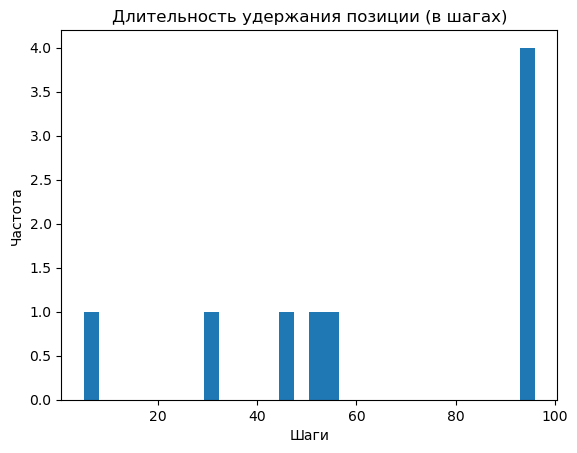

✅ Total reward: -4360.55
🔁 Total trades executed: 17
📉 Max drawdown: 186.92
📈 Sharpe Ratio: -1.56


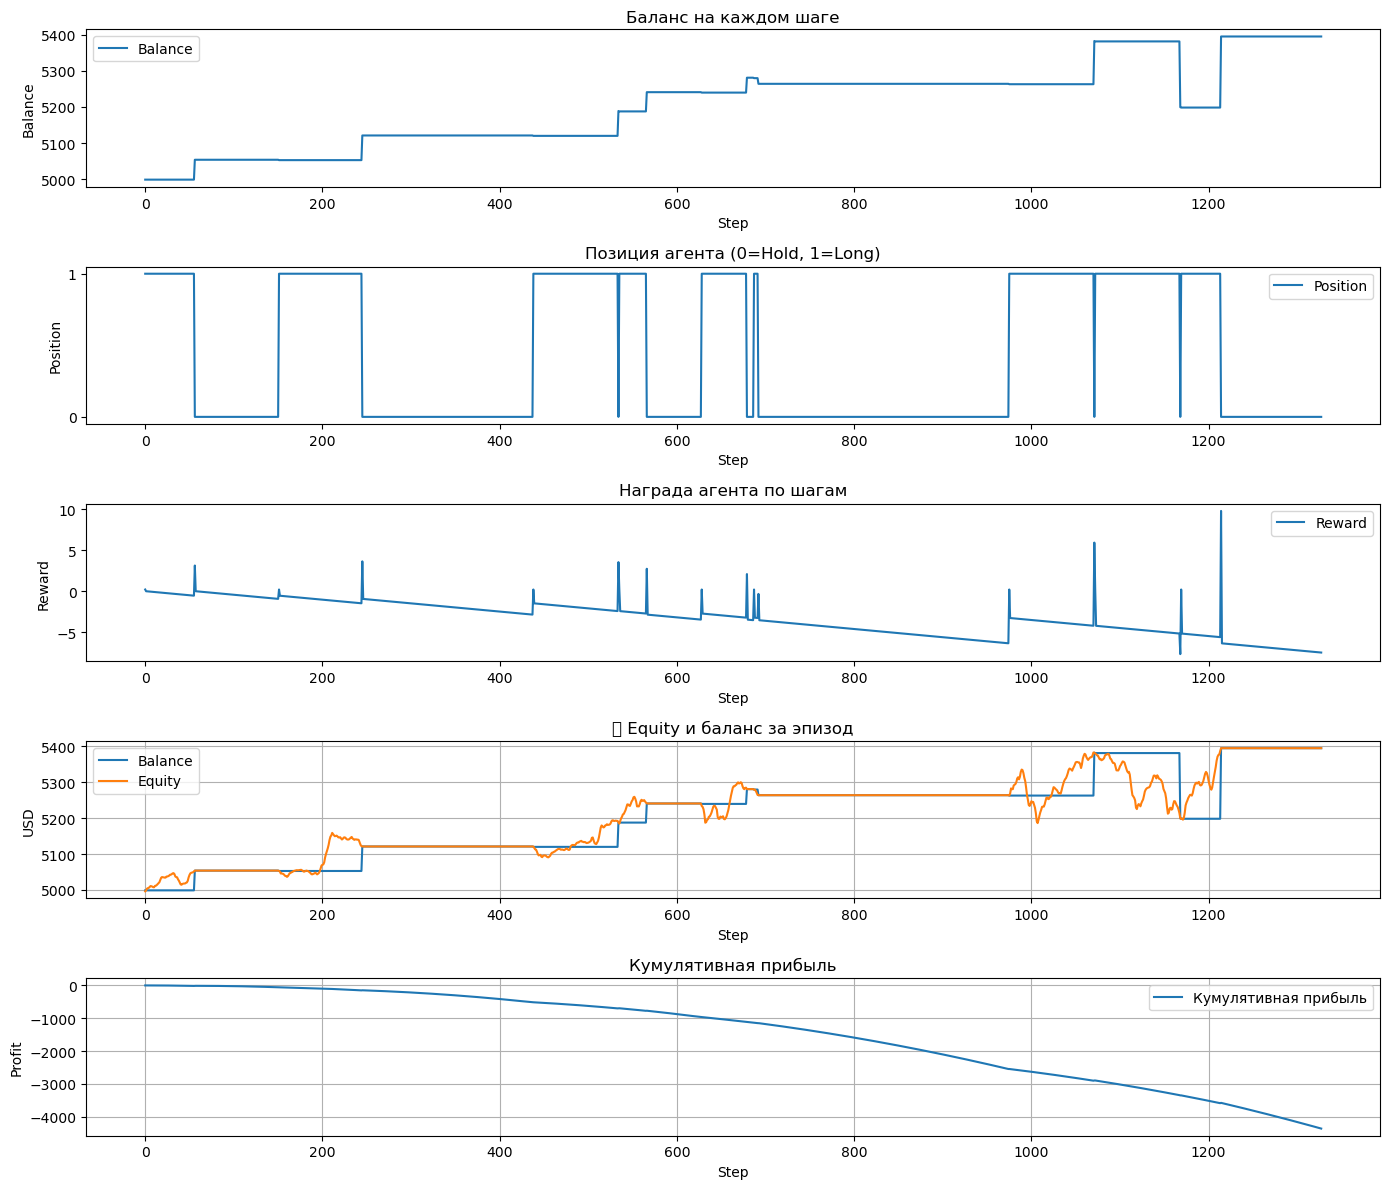

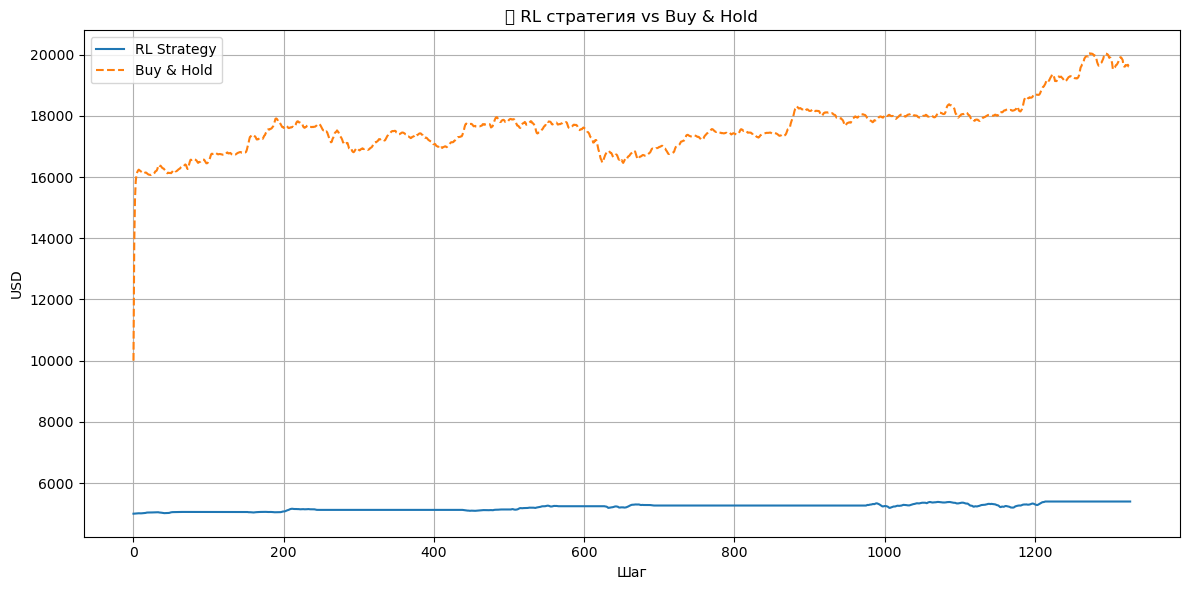


Общее число сделок: 81393
Средняя длительность сделки (в шагах): 2.83
Средняя прибыль на сделку: -0.00
Суммарная прибыль: -115.57


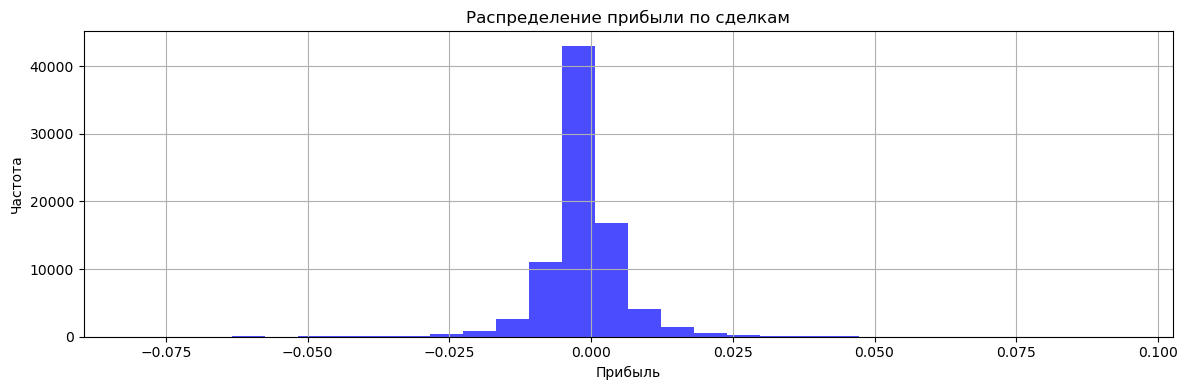

📊 Метрики по всем эпизодам:
▶ Средняя Total Reward: -4360.55
▶ Средний Sharpe Ratio: -1.56
▶ Средний Max Drawdown: 190.45
▶ Среднее число сделок: 81402.00
▶ Средняя прибыль на сделку: -0.00
▶ Средняя длительность сделки: 2.83 шагов


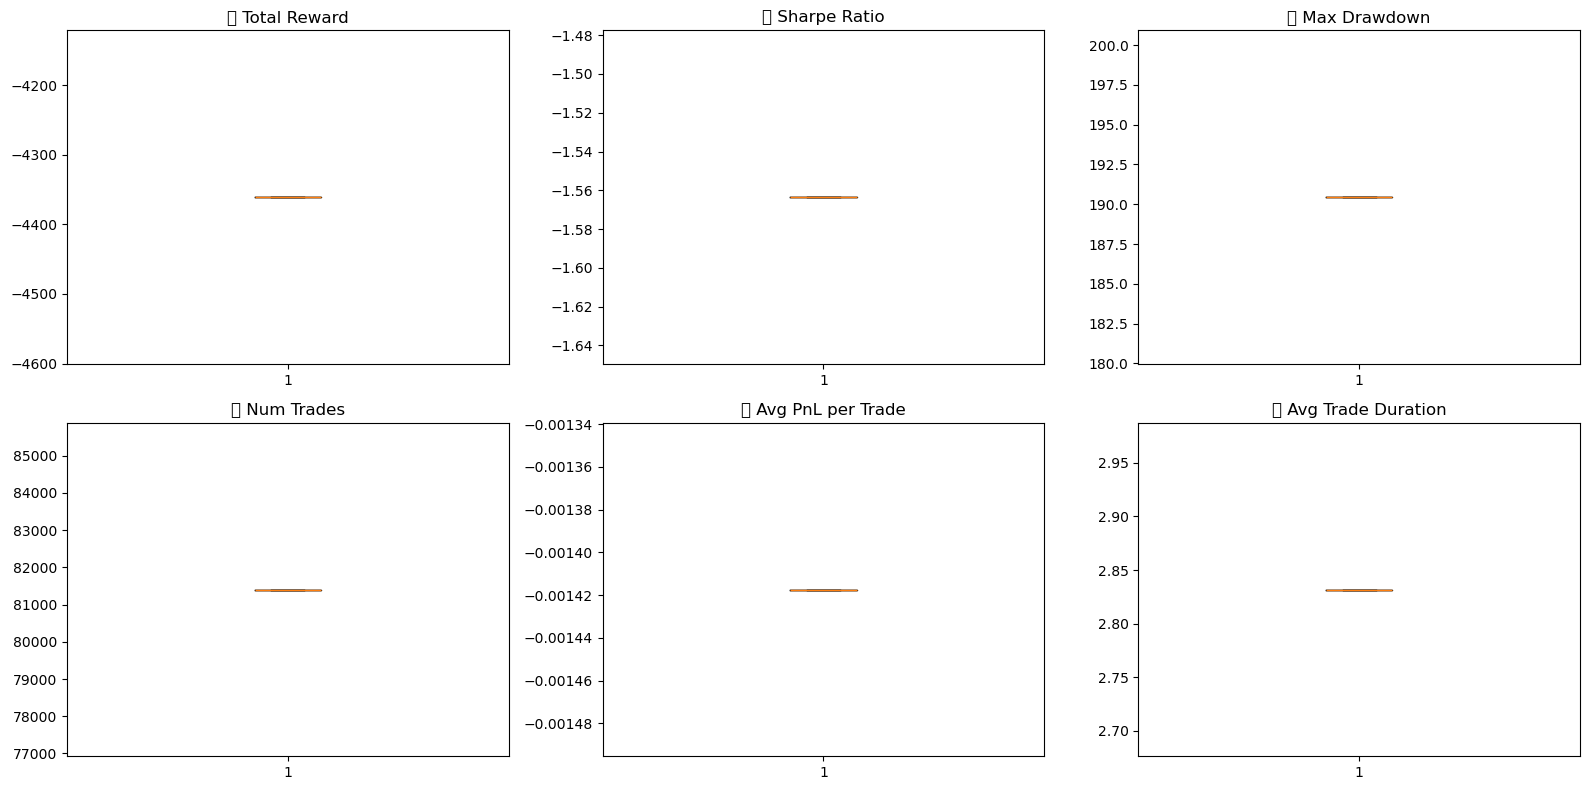

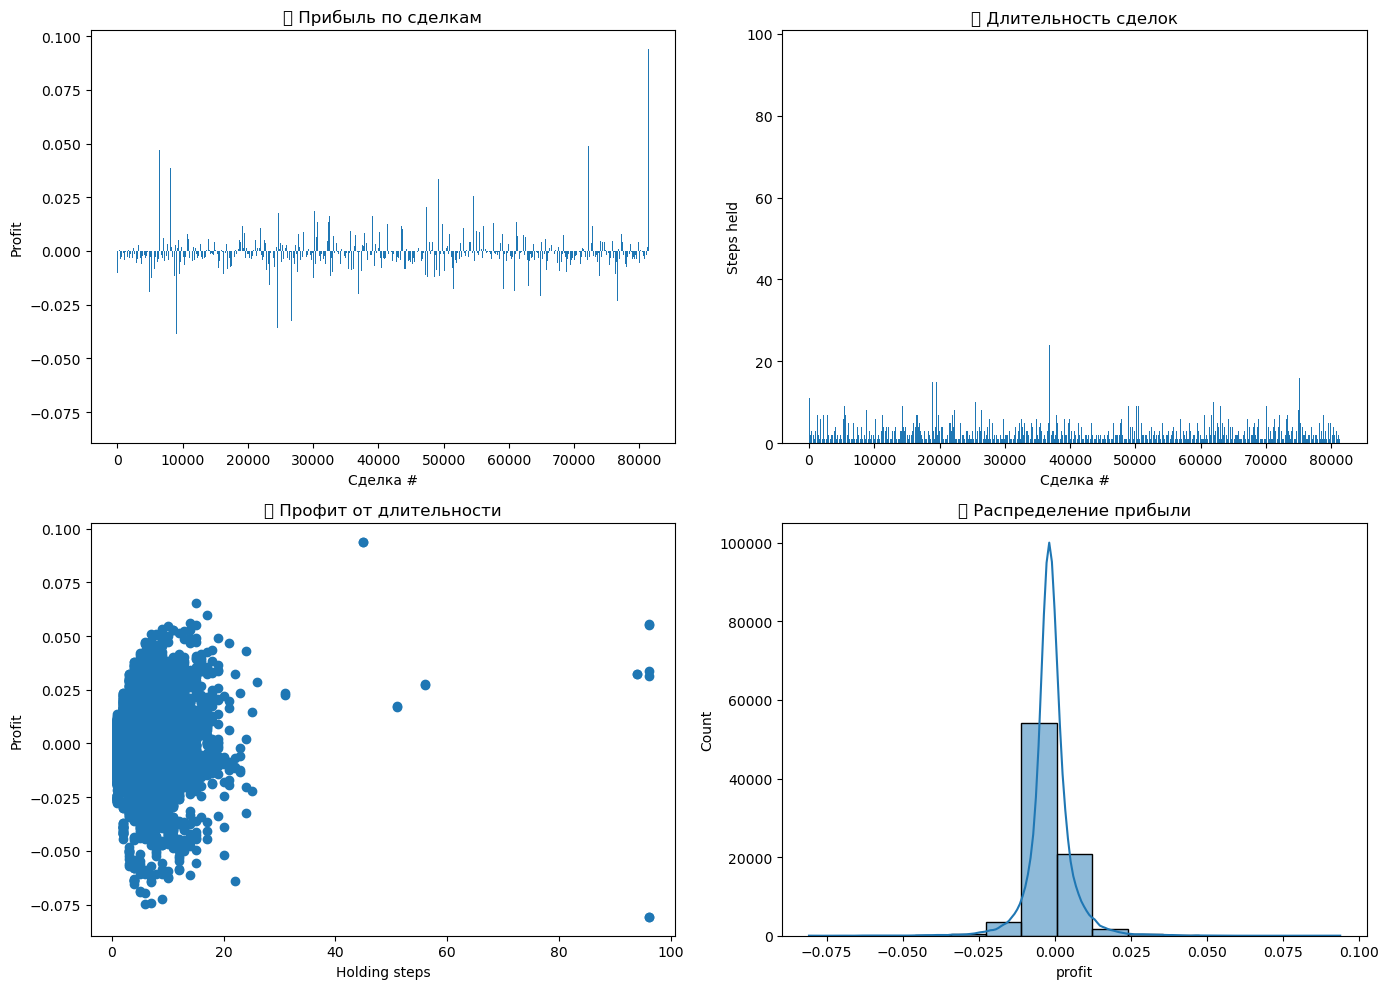

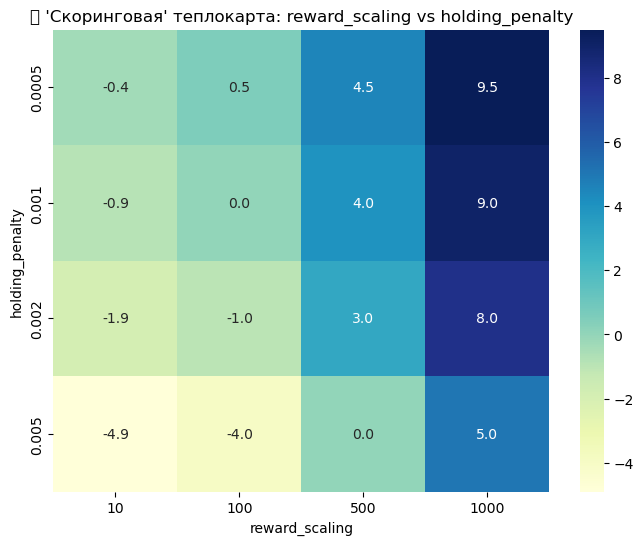

       entry_step  exit_step    profit   holding  entry_price  exit_price
count   81,402.00  81,402.00 81,402.00 81,402.00    81,402.00   81,402.00
mean     1,331.48   1,334.32     -0.00      2.83     2,240.33    2,239.31
std        384.86     384.86      0.01      2.54       140.82      140.37
min        672.00     673.00     -0.08      1.00     1,971.95    1,973.70
25%        998.00   1,001.00     -0.00      1.00     2,137.72    2,136.26
50%      1,328.00   1,331.00     -0.00      2.00     2,196.38    2,197.31
75%      1,666.00   1,668.00      0.00      4.00     2,372.65    2,371.49
max      1,999.00   2,000.00      0.09     96.00     2,537.49    2,536.68


In [24]:
test(vec_env_eth, model_eth, eth_with_ta, crypt="eth")

In [63]:
print(eth_with_ta["target_expert"].value_counts(normalize=True))

target_expert
1   0.51
2   0.25
0   0.24
Name: proportion, dtype: float64


In [17]:
eth_with_ta.index = pd.to_datetime(eth_with_ta.index)
split_date = pd.to_datetime("2025-04-25")

df_train = eth_with_ta[eth_with_ta.index < split_date].copy()
df_future = eth_with_ta[eth_with_ta.index >= split_date].copy()

print("Train:", df_train.shape)
print("Future:", df_future.shape)

Train: (142501, 81)
Future: (8766, 81)


In [18]:
X = df_future.drop(columns=["target", "future_return","target_expert"])
y = df_future["target_expert"]
# Разделим на train/test
X_train_expert, X_test_expert, y_train_expert, y_test_expert = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify — сохраняет пропорции классов
)

In [36]:
X_train_expert.shape

(7012, 78)

In [78]:
def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "random_state": 42,
    }

    model = XGBClassifier(**param)
    model.fit(X_train_expert, y_train_expert)

    preds = model.predict(X_test)
    return f1_score(y_test, preds, average="macro")

In [79]:
# Запуск Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

print("Лучшие параметры:", study.best_params)

[I 2025-07-27 10:45:11,067] A new study created in memory with name: no-name-ff9f3483-d46d-483b-9ce1-57eaf2ddc8ad
[I 2025-07-27 10:45:12,206] Trial 0 finished with value: 0.5621215071824742 and parameters: {'max_depth': 3, 'learning_rate': 0.02049569162329303, 'n_estimators': 420, 'subsample': 0.9430452350214595, 'colsample_bytree': 0.9423928801980259, 'scale_pos_weight': 3.8474609054495335}. Best is trial 0 with value: 0.5621215071824742.
[I 2025-07-27 10:45:19,971] Trial 1 finished with value: 0.7071607621961732 and parameters: {'max_depth': 9, 'learning_rate': 0.0257906881911381, 'n_estimators': 356, 'subsample': 0.7639783132949989, 'colsample_bytree': 0.6196275192264178, 'scale_pos_weight': 3.697264706288721}. Best is trial 1 with value: 0.7071607621961732.
[I 2025-07-27 10:45:21,953] Trial 2 finished with value: 0.7139164374458492 and parameters: {'max_depth': 8, 'learning_rate': 0.22598765355241018, 'n_estimators': 114, 'subsample': 0.8513816188575176, 'colsample_bytree': 0.55553

Лучшие параметры: {'max_depth': 10, 'learning_rate': 0.09453369090547431, 'n_estimators': 246, 'subsample': 0.7533587168304928, 'colsample_bytree': 0.5245106568869861, 'scale_pos_weight': 0.8968322927711724}


In [53]:
best_params = {
    'max_depth': 10, 'learning_rate': 0.09453369090547431, 'n_estimators': 246, 'subsample': 0.7533587168304928, 'colsample_bytree': 0.5245106568869861, 'scale_pos_weight': 0.8968322927711724,
    'random_state': 42,
    'use_label_encoder': False,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_expert, y_train_expert)

y_pred = final_model.predict(X_test_expert)

print(confusion_matrix(y_test_expert, y_pred))
print(classification_report(y_test_expert, y_pred))

[[210 174  35]
 [ 65 701  81]
 [ 23 167 298]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.59       419
           1       0.67      0.83      0.74       847
           2       0.72      0.61      0.66       488

    accuracy                           0.69      1754
   macro avg       0.70      0.65      0.66      1754
weighted avg       0.69      0.69      0.68      1754



In [25]:
joblib.dump(final_model, "xgb_model_old.pkl")


['xgb_model_old.pkl']

In [24]:
final_model = joblib.load("xgb_model.pkl")

In [45]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_expert, y_train_expert)
y_pred = rf.predict(X_test_expert)

print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred, digits=4))



Confusion Matrix:
[[206 170  43]
 [ 61 713  73]
 [ 30 185 273]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6936    0.4916    0.5754       419
           1     0.6676    0.8418    0.7446       847
           2     0.7018    0.5594    0.6226       488

    accuracy                         0.6796      1754
   macro avg     0.6877    0.6310    0.6475      1754
weighted avg     0.6833    0.6796    0.6703      1754



In [49]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
    }
    clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    return cross_val_score(clf, X_train_expert, y_train_expert, cv=3, scoring="accuracy").mean()


In [50]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=400)

print("Best parameters:", study.best_params)

[I 2025-07-29 11:32:54,662] A new study created in memory with name: no-name-94682b94-755e-42d8-9aa8-c15cc6444627
[I 2025-07-29 11:33:00,291] Trial 0 finished with value: 0.6053909053340228 and parameters: {'n_estimators': 486, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6053909053340228.
[I 2025-07-29 11:33:04,679] Trial 1 finished with value: 0.5974050432053554 and parameters: {'n_estimators': 362, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6053909053340228.
[I 2025-07-29 11:33:07,356] Trial 2 finished with value: 0.547632835069515 and parameters: {'n_estimators': 290, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6053909053340228.
[I 2025-07-29 11:33:09,484] Trial 3 finished with value: 0.530376742694085 and parameters: {'n_estimators': 249, 'max_depth': 4, 'min_

Best parameters: {'n_estimators': 449, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [52]:
rf_best = RandomForestClassifier(**study.best_params, random_state=42)
rf_best.fit(X_train_expert, y_train_expert)
y_pred = rf_best.predict(X_test_expert)

print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred, digits=4))


Confusion Matrix:
[[200 182  37]
 [ 54 726  67]
 [ 28 179 281]]

Classification Report:
              precision    recall  f1-score   support

           0     0.7092    0.4773    0.5706       419
           1     0.6679    0.8571    0.7508       847
           2     0.7299    0.5758    0.6438       488

    accuracy                         0.6881      1754
   macro avg     0.7023    0.6368    0.6550      1754
weighted avg     0.6950    0.6881    0.6780      1754



In [54]:
voting = VotingClassifier(
    estimators=[("xgb", final_model), ("rf", rf_best)],
    voting="soft"  # можно "hard", но soft часто лучше
)
voting.fit(X_train_expert, y_train_expert)
y_pred = voting.predict(X_test_expert)

print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred, digits=4))

Confusion Matrix:
[[212 172  35]
 [ 62 721  64]
 [ 23 173 292]]

Classification Report:
              precision    recall  f1-score   support

           0     0.7138    0.5060    0.5922       419
           1     0.6764    0.8512    0.7538       847
           2     0.7468    0.5984    0.6644       488

    accuracy                         0.6984      1754
   macro avg     0.7123    0.6519    0.6701      1754
weighted avg     0.7049    0.6984    0.6903      1754



In [68]:
# Стекинг с двумя базовыми моделями
stack_model = StackingClassifier(
    estimators=[
        ("xgb", final_model),
        ("rf", rf_best),
        ("ligGBM",models_ligGBM)
    ],
    final_estimator = GradientBoostingClassifier(n_estimators=100, max_depth=3),
    passthrough=True,  # передаёт оригинальные фичи в финальную модель тоже (можно False)
    n_jobs=-1
)

# Обучение
stack_model.fit(X_train_expert, y_train_expert)

# Предсказания
y_pred_stack = stack_model.predict(X_test_expert)

# Оценка
print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred_stack))

print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred_stack))

print("Accuracy:", accuracy_score(y_test_expert, y_pred_stack))

/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:36:30] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/core.p

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 5609, number of used features: 78
[LightGBM] [Info] Start training from score -1.432449
[LightGBM] [Info] Start training from score -0.727793
[LightGBM] [Info] Start training from score -1.279046
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 5609, number of used features: 78
[LightGBM] [Info] Start training from score -1.432449
[LightGBM] [Info] Start training from score -0.727793
[LightGBM] [Info] Start training from score -1.279046
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013751 sec

In [73]:
mlp_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
)

stack_model = StackingClassifier(
    estimators=[
        ("xgb", final_model),
        ("rf", rf_best),
        ("ligGBM", models_ligGBM)
    ],
    final_estimator=mlp_pipeline,
    passthrough=True,
    n_jobs=-1
)


# Обучение
stack_model.fit(X_train_expert, y_train_expert)

# Предсказания
y_pred_stack = stack_model.predict(X_test_expert)

# Оценка
print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred_stack))

print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred_stack))

print("Accuracy:", accuracy_score(y_test_expert, y_pred_stack))

/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:47:09] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/core.p

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 5610, number of used features: 78
[LightGBM] [Info] Start training from score -1.432628
[LightGBM] [Info] Start training from score -0.727971
[LightGBM] [Info] Start training from score -1.278584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 5609, number of used features: 78
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Start training from score -1.432449
[LightGBM] [Info] Start training from score 

In [70]:
# Стекинг с двумя базовыми моделями
stack_model = StackingClassifier(
    estimators=[
        ("xgb", final_model),
        ("rf", rf_best),
        ("ligGBM",models_ligGBM)
    ],
    final_estimator = RandomForestClassifier(**study.best_params),
    passthrough=True,  # передаёт оригинальные фичи в финальную модель тоже (можно False)
    n_jobs=-1
)

# Обучение
stack_model.fit(X_train_expert, y_train_expert)

# Предсказания
y_pred_stack = stack_model.predict(X_test_expert)

# Оценка
print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred_stack))

print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred_stack))

print("Accuracy:", accuracy_score(y_test_expert, y_pred_stack))

/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:43:57] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/saatarko/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/core.p

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 5610, number of used features: 78
[LightGBM] [Info] Start training from score -1.432628
[LightGBM] [Info] Start training from score -0.727971
[LightGBM] [Info] Start training from score -1.278584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 5609, number of used features: 78
[LightGBM] [Info] Start training from score -1.432449
[LightGBM

In [64]:
warnings.filterwarnings('ignore')

models_ligGBM = LGBMClassifier(random_state=42)

models_ligGBM.fit(X_train_expert, y_train_expert)
y_pred = models_ligGBM.predict(X_test_expert)

print("Confusion Matrix:")
print(confusion_matrix(y_test_expert, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_expert, y_pred, digits=4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15089
[LightGBM] [Info] Number of data points in the train set: 7012, number of used features: 78
[LightGBM] [Info] Start training from score -1.432407
[LightGBM] [Info] Start training from score -0.727974
[LightGBM] [Info] Start training from score -1.278768
Confusion Matrix:
[[179 194  46]
 [ 72 682  93]
 [ 36 195 257]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6237    0.4272    0.5071       419
           1     0.6368    0.8052    0.7112       847
           2     0.6490    0.5266    0.5814       488

    accuracy                         0.6374      1754
   macro avg     0.6365    0.5863    0.5999      1754
weighted avg     0.6371    0.6374    0.6263      1754



In [19]:
excluded = ['future_return', 'target', "target_expert"]
state_columns_eth_da = [col for col in df_future.columns if col not in excluded]

In [20]:
excluded = ['future_return', 'target', "target_expert"]
state_columns_eth = [col for col in df_train.columns if col not in excluded]

In [25]:
def make_env_eth():
    return ETHTradingEnv(
        df=df_train,
        state_columns=state_columns_eth,
        initial_balance=5000,
        trade_penalty=0.01,
        max_steps=2000,
        reward_scaling=100,
        window_size=672  # 7 дней по 15 минут
    )

vec_env_eth = DummyVecEnv([make_env_eth])

In [26]:
# 3. Обучим агента
model_eth = PPOWithImitation(
        policy=TransformerPolicy,
        env=vec_env_eth,
        verbose=1,
        n_steps=1344,
        batch_size=128,
        gae_lambda=0.95,
        gamma=0.99,
        n_epochs=10,
        learning_rate=3e-4,
        clip_range=0.2,
        max_grad_norm=0.5,
        vf_coef=0.5,
        normalize_advantage=True,
        ent_coef=0.2,
        imitation_coef=0.5  # вот параметр имитации
    )
model_eth.learn(total_timesteps=450_000, progress_bar=True)

Using cuda device


Output()

-----------------------------
| time/              |      |
|    fps             | 222  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 1344 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 2           |
|    time_elapsed         | 47          |
|    total_timesteps      | 2688        |
| train/                  |             |
|    approx_kl            | 0.010743997 |
|    clip_fraction        | 0.0862      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.000296   |
|    learning_rate        | 0.0003      |
|    loss                 | 0.414       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00939    |
|    value_loss           | 0.745       |
-----------------------------------------
----------------------------------

In [27]:
model_eth.save("ppo_eth_trading_v3")

In [21]:
def make_env_eth_da():
    return ETHTradingEnv(
        df=df_future,
        state_columns=state_columns_eth_da,
        initial_balance=5000,
        trade_penalty=0.01,
        max_steps=2000,
        reward_scaling=100,
        window_size=672  # 7 дней по 15 минут
    )

vec_env_eth_da = DummyVecEnv([make_env_eth_da])

In [28]:
dagger_model_eth = PPOWithImitation.load(
        "ppo_dagger_final",
        env=vec_env_eth_da,
        custom_objects={"policy_class": TransformerPolicy}
    )

Создана (или уже существует) папка: dagger_eth
✅ dagger_eth Total reward for episode: -4533.40
🔁 dagger_eth Total trades executed: 20
📉 Max drawdown: 126.41
📈 Sharpe Ratio: -1.45
Логи эпизода сохранены в dagger_eth/episode_run_log.csv


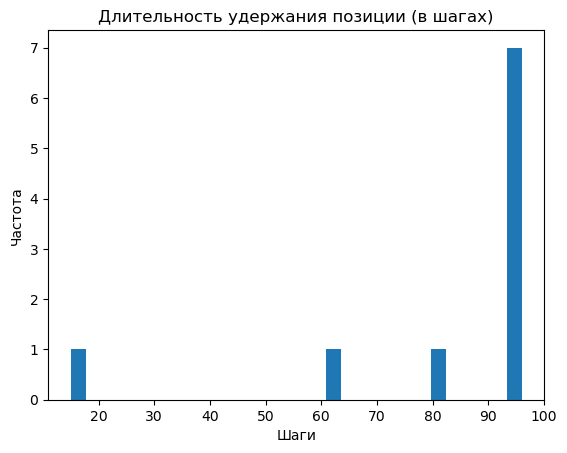

✅ Total reward: -4533.40
🔁 Total trades executed: 19
📉 Max drawdown: 126.41
📈 Sharpe Ratio: -1.45


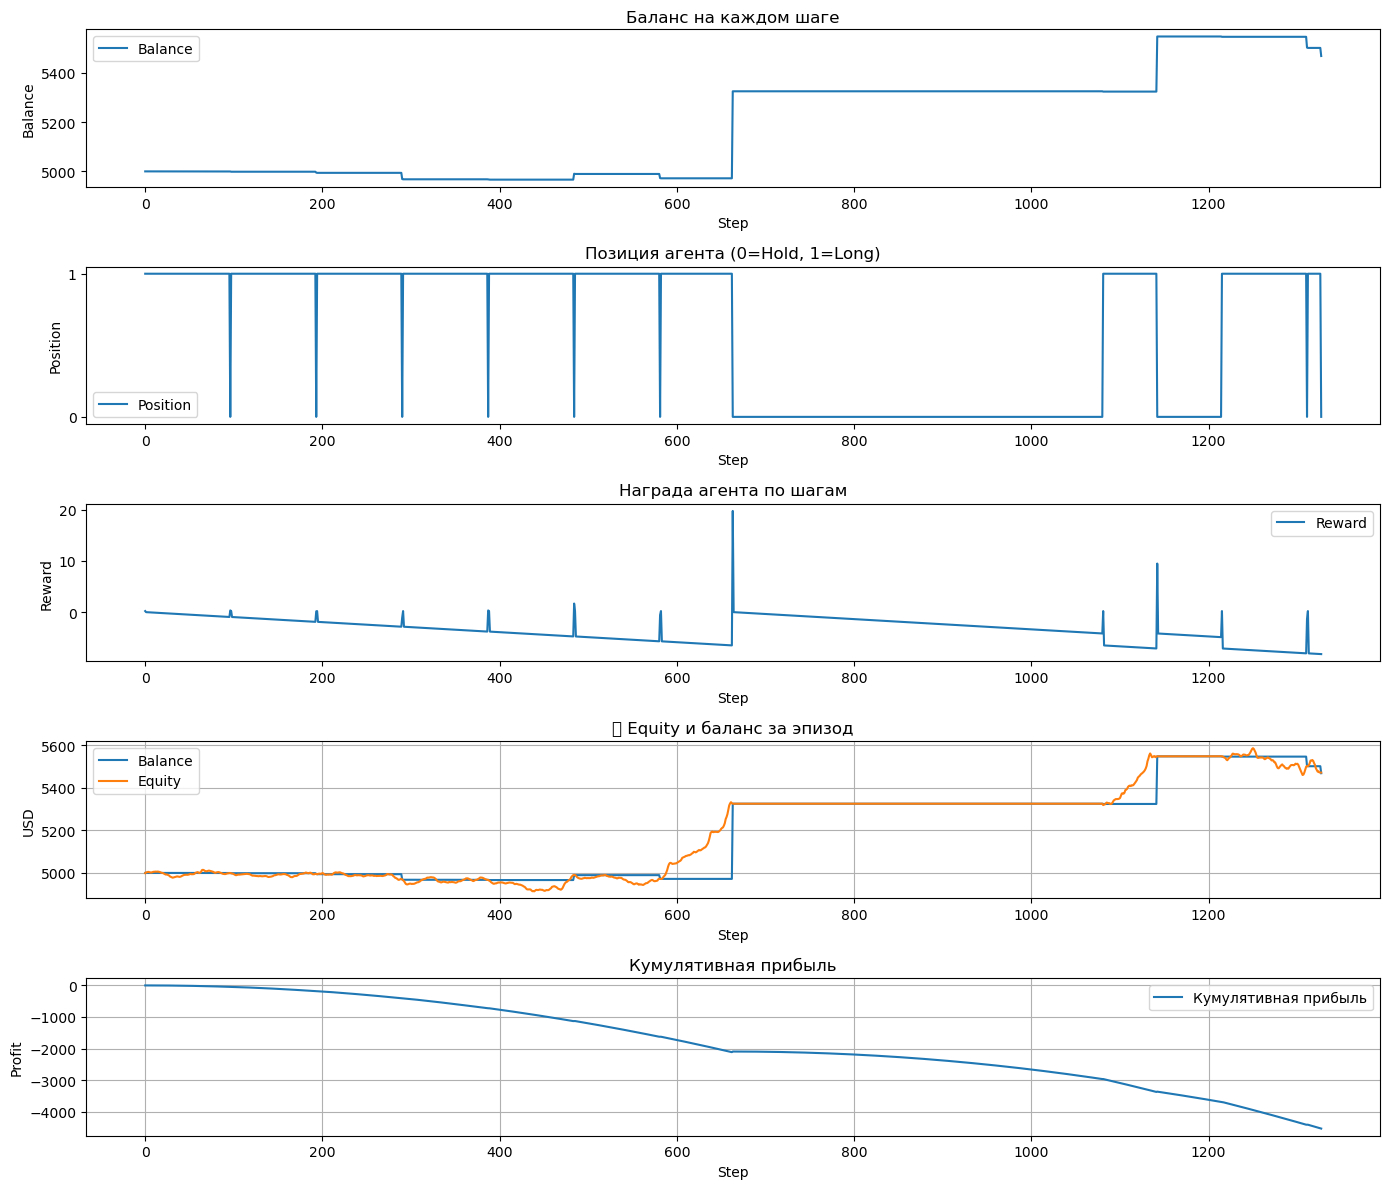

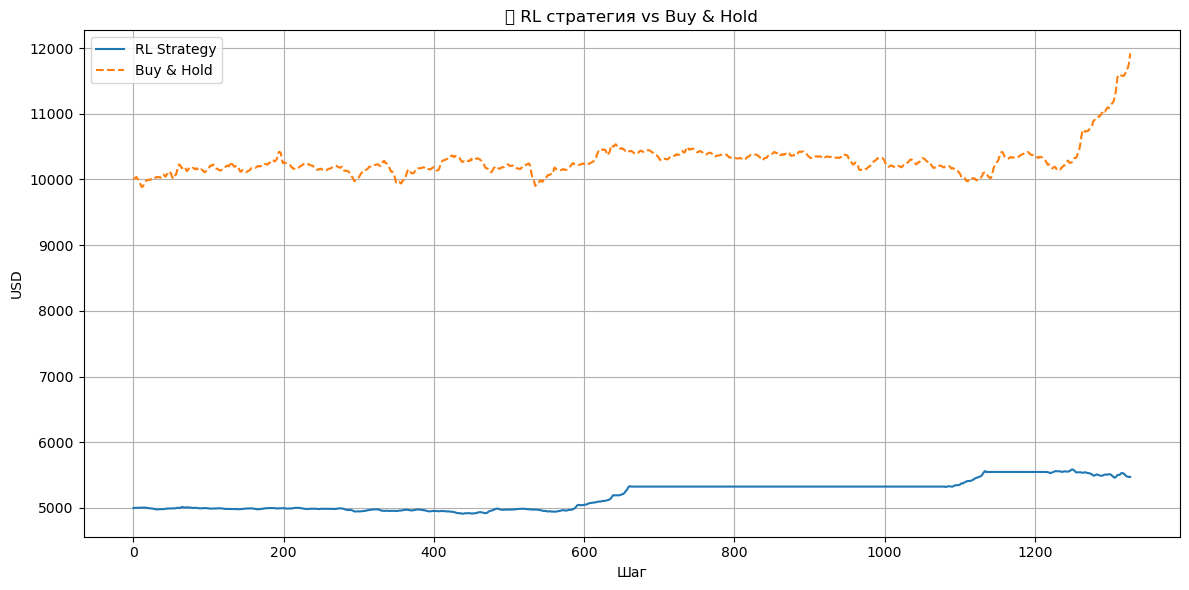


Общее число сделок: 10
Средняя длительность сделки (в шагах): 83.00
Средняя прибыль на сделку: 0.02
Суммарная прибыль: 0.24


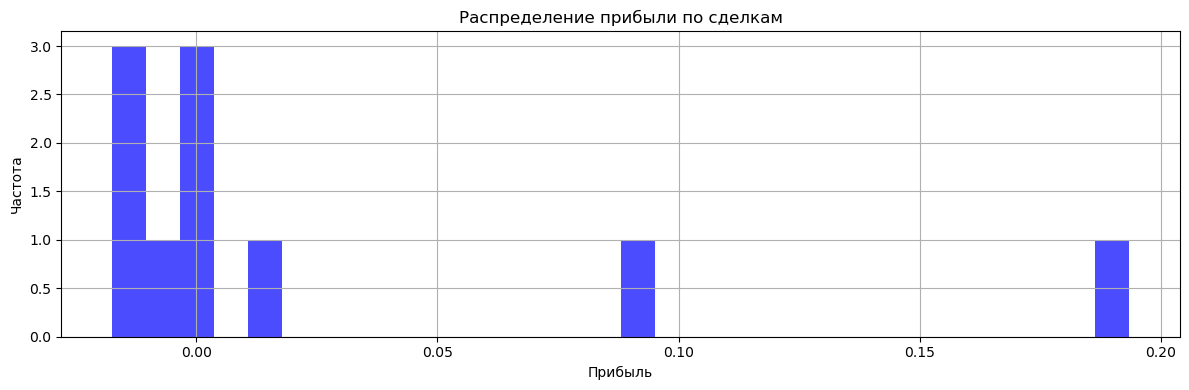

📊 Метрики по всем эпизодам:
▶ Средняя Total Reward: -4533.18
▶ Средний Sharpe Ratio: -1.45
▶ Средний Max Drawdown: 126.41
▶ Среднее число сделок: 20.00
▶ Средняя прибыль на сделку: 0.02
▶ Средняя длительность сделки: 83.00 шагов


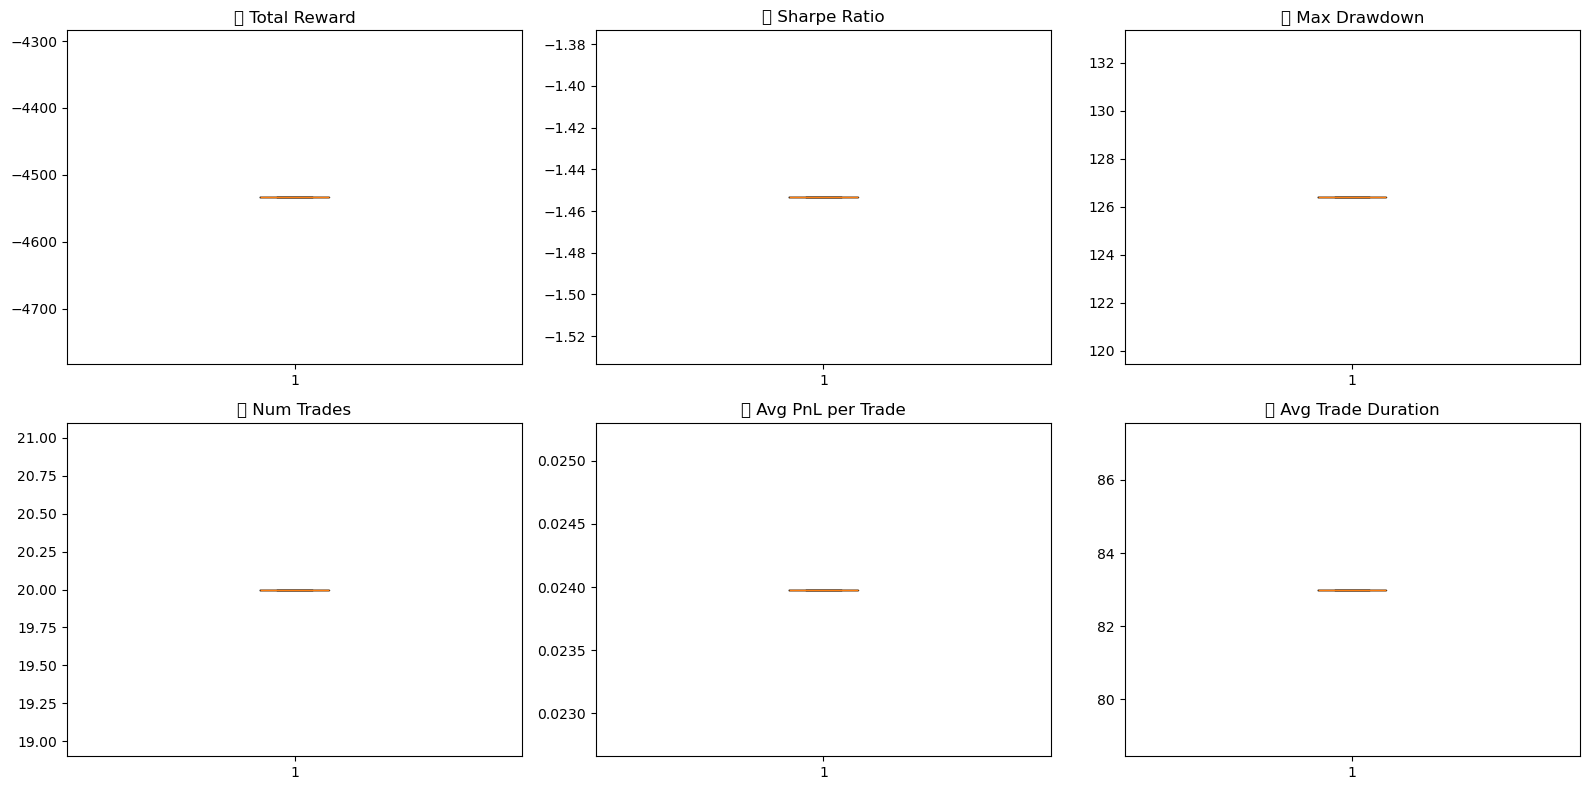

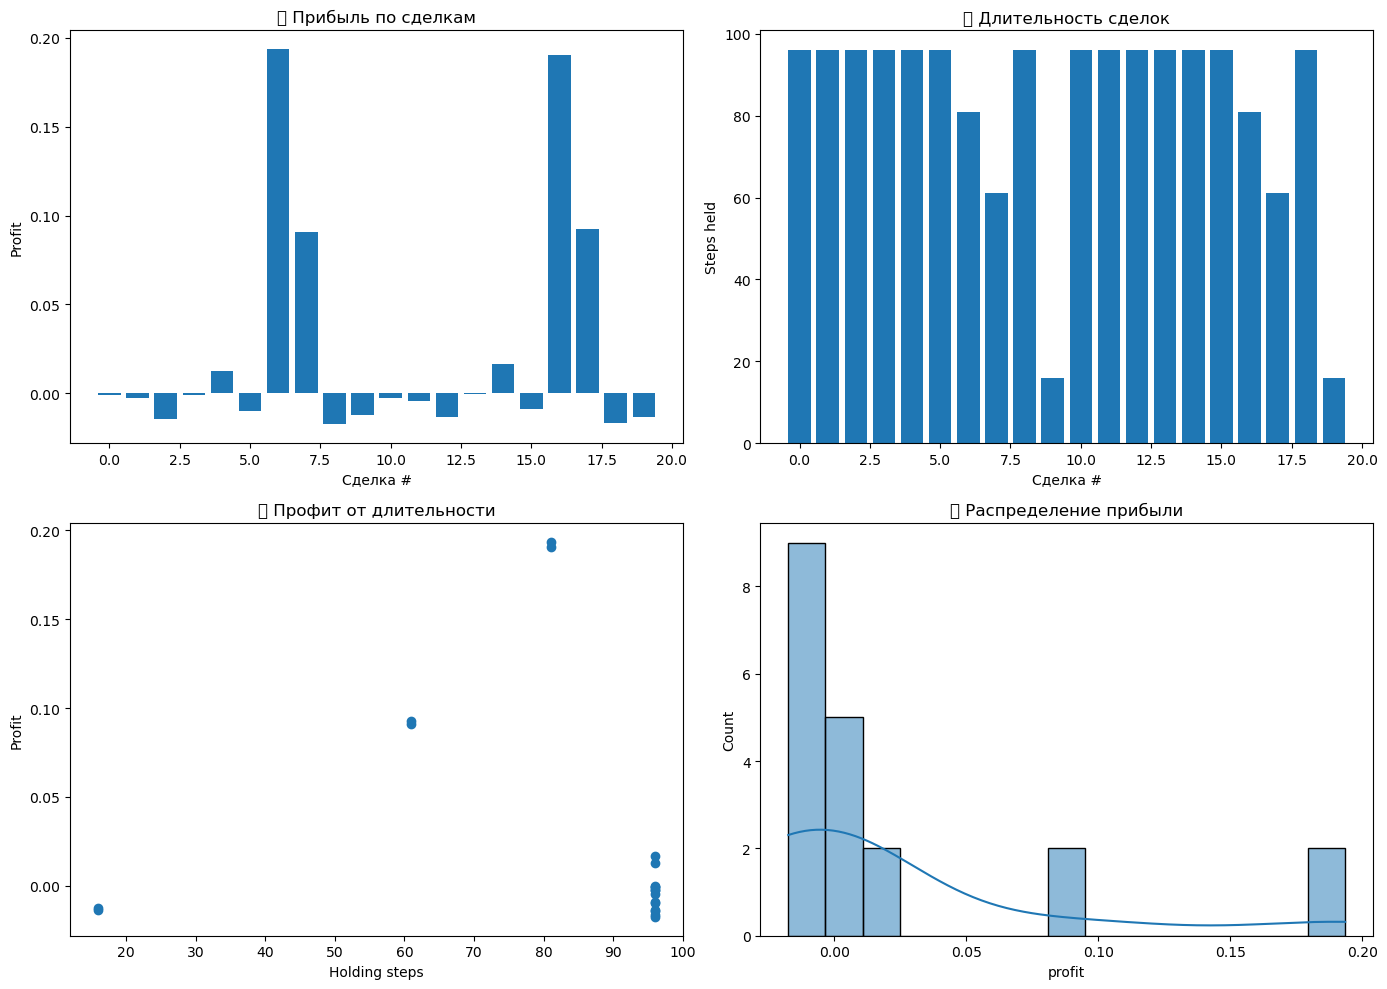

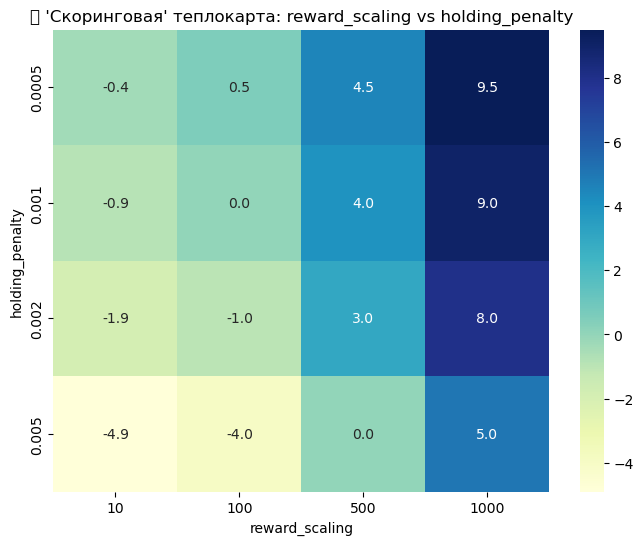

       entry_step  exit_step  profit  holding  entry_price  exit_price
count       20.00      20.00   20.00    20.00        20.00       20.00
mean     1,236.50   1,319.50    0.02    83.00     2,042.43    2,091.76
std        462.91     445.52    0.07    25.46       333.54      351.97
min        672.00     768.00   -0.02    16.00     1,810.66    1,811.21
25%        866.00     962.00   -0.01    81.00     1,826.91    1,828.10
50%      1,108.50   1,204.50   -0.00    96.00     1,840.65    1,842.10
75%      1,753.00   1,814.00    0.01    96.00     2,454.94    2,528.42
max      1,984.00   2,000.00    0.19    96.00     2,594.58    2,684.77


In [29]:
test(vec_env_eth_da, dagger_model_eth, df_future, crypt="dagger_eth")

In [24]:
dagger_model_eth = PPOWithImitation.load(
        "ppo_dagger_final",
        env=vec_env_eth_da,
        custom_objects={"policy_class": TransformerPolicy}
    )

Создана (или уже существует) папка: dagger_eth_2
✅ dagger_eth_2 Total reward for episode: -5682.14
🔁 dagger_eth_2 Total trades executed: 28
📉 Max drawdown: 111.06
📈 Sharpe Ratio: -1.31
Логи эпизода сохранены в dagger_eth_2/episode_run_log.csv


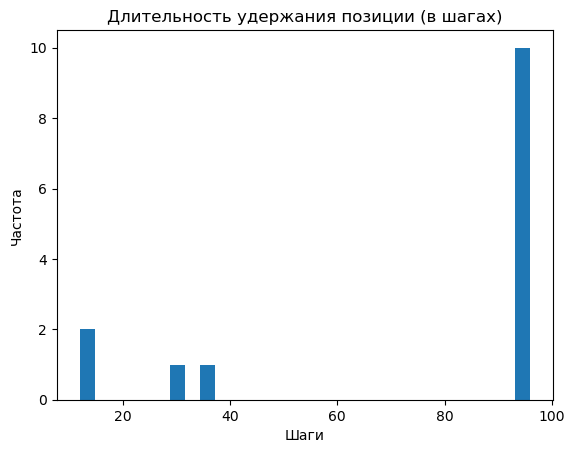

✅ Total reward: -5682.14
🔁 Total trades executed: 27
📉 Max drawdown: 111.06
📈 Sharpe Ratio: -1.31


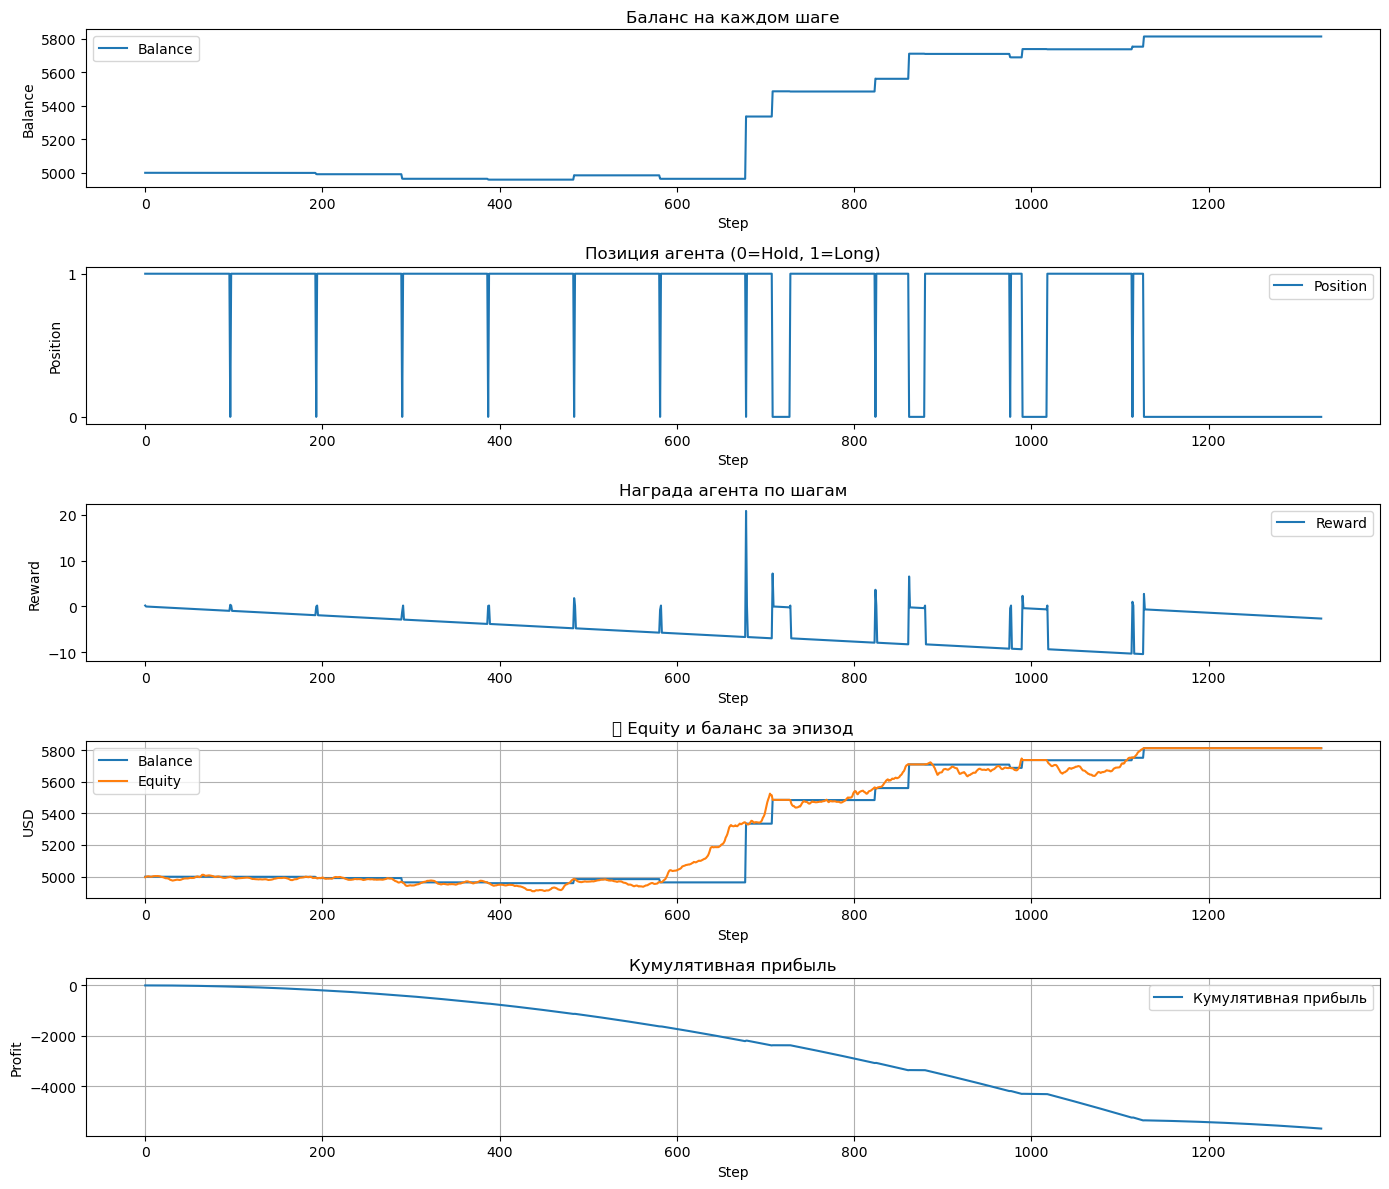

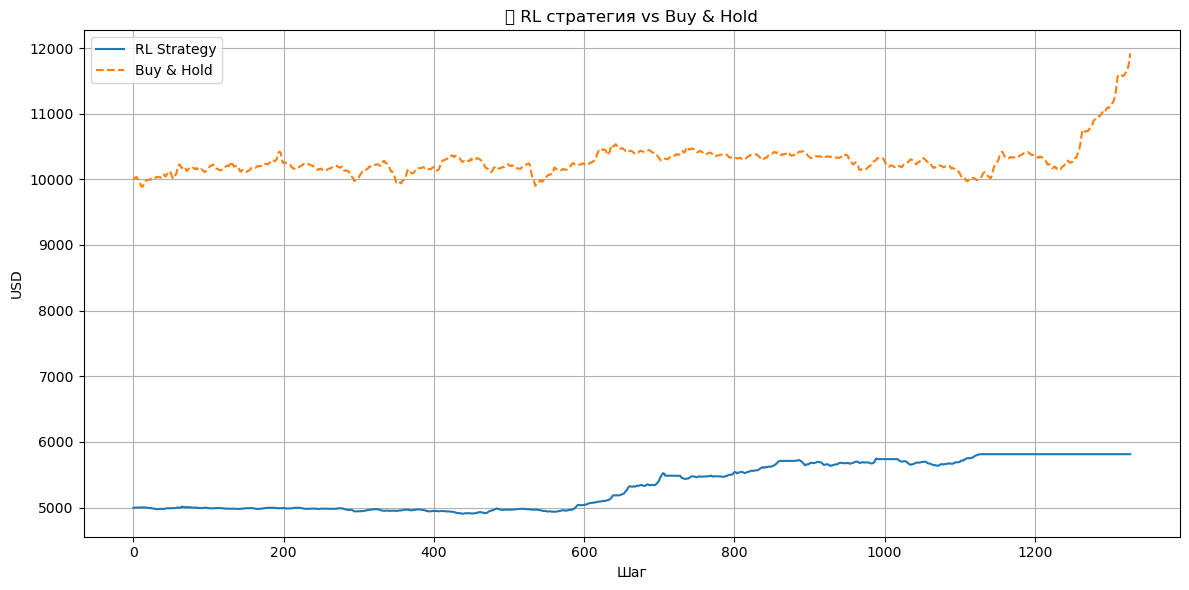


Общее число сделок: 14
Средняя длительность сделки (в шагах): 75.07
Средняя прибыль на сделку: 0.03
Суммарная прибыль: 0.39


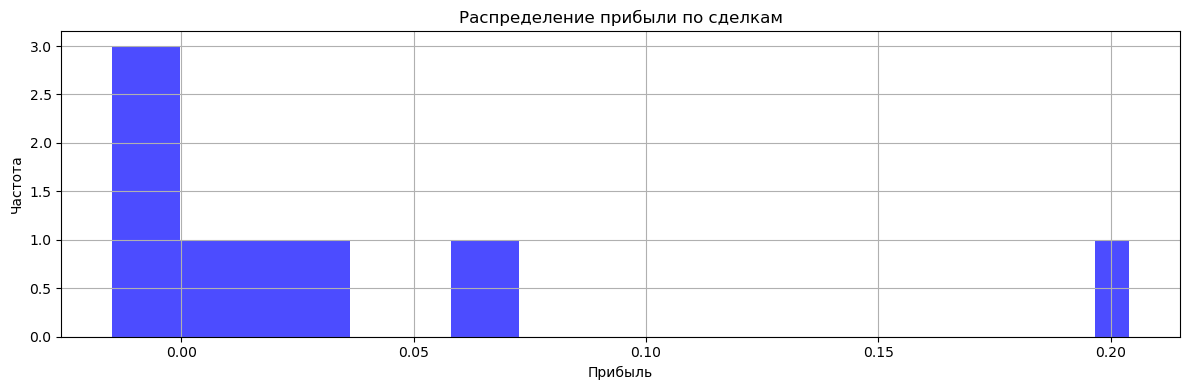

📊 Метрики по всем эпизодам:
▶ Средняя Total Reward: -5682.18
▶ Средний Sharpe Ratio: -1.31
▶ Средний Max Drawdown: 114.22
▶ Среднее число сделок: 28.00
▶ Средняя прибыль на сделку: 0.03
▶ Средняя длительность сделки: 75.07 шагов


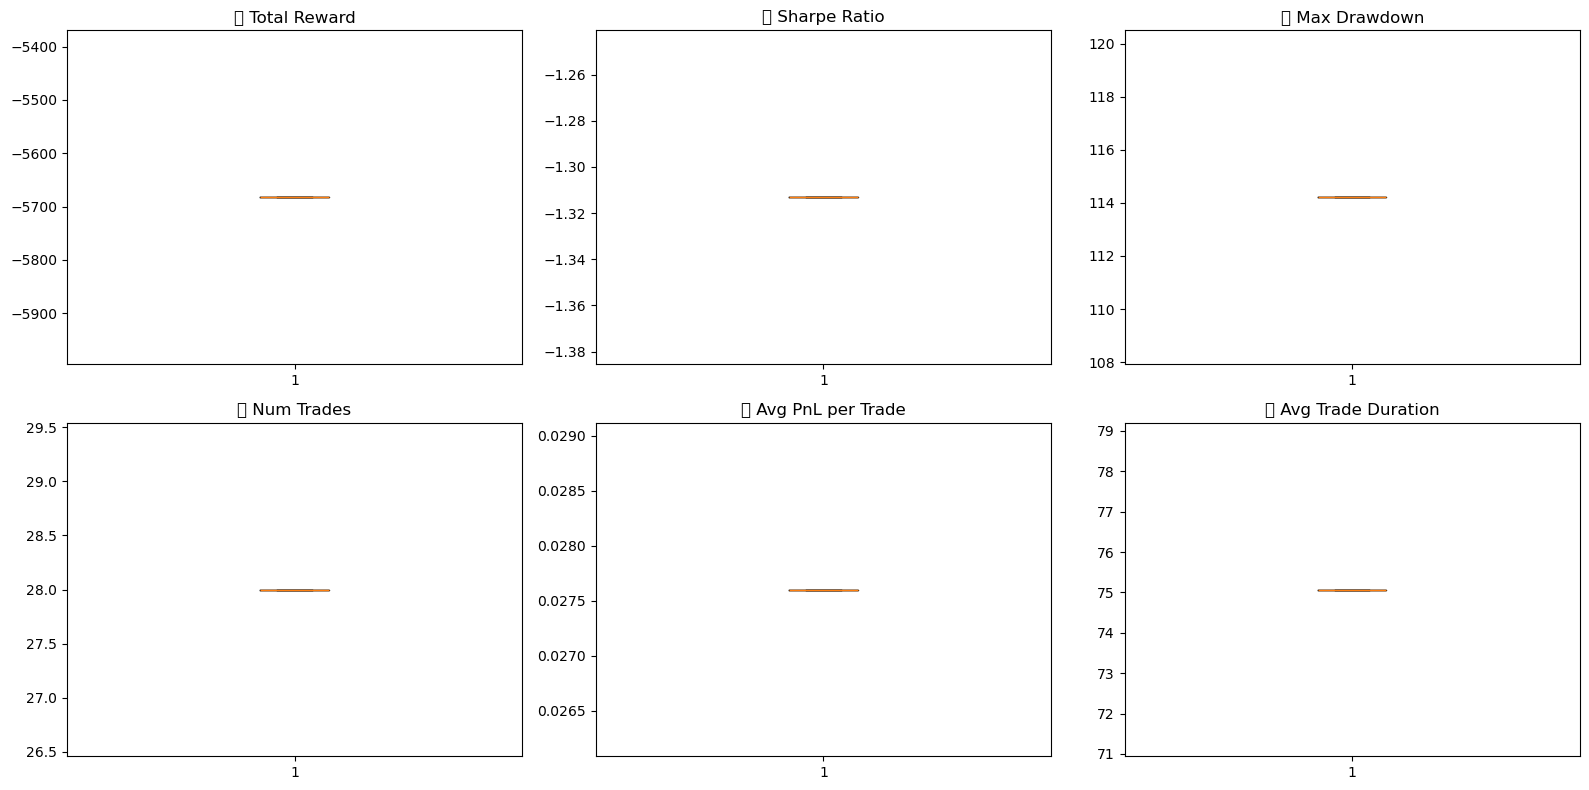

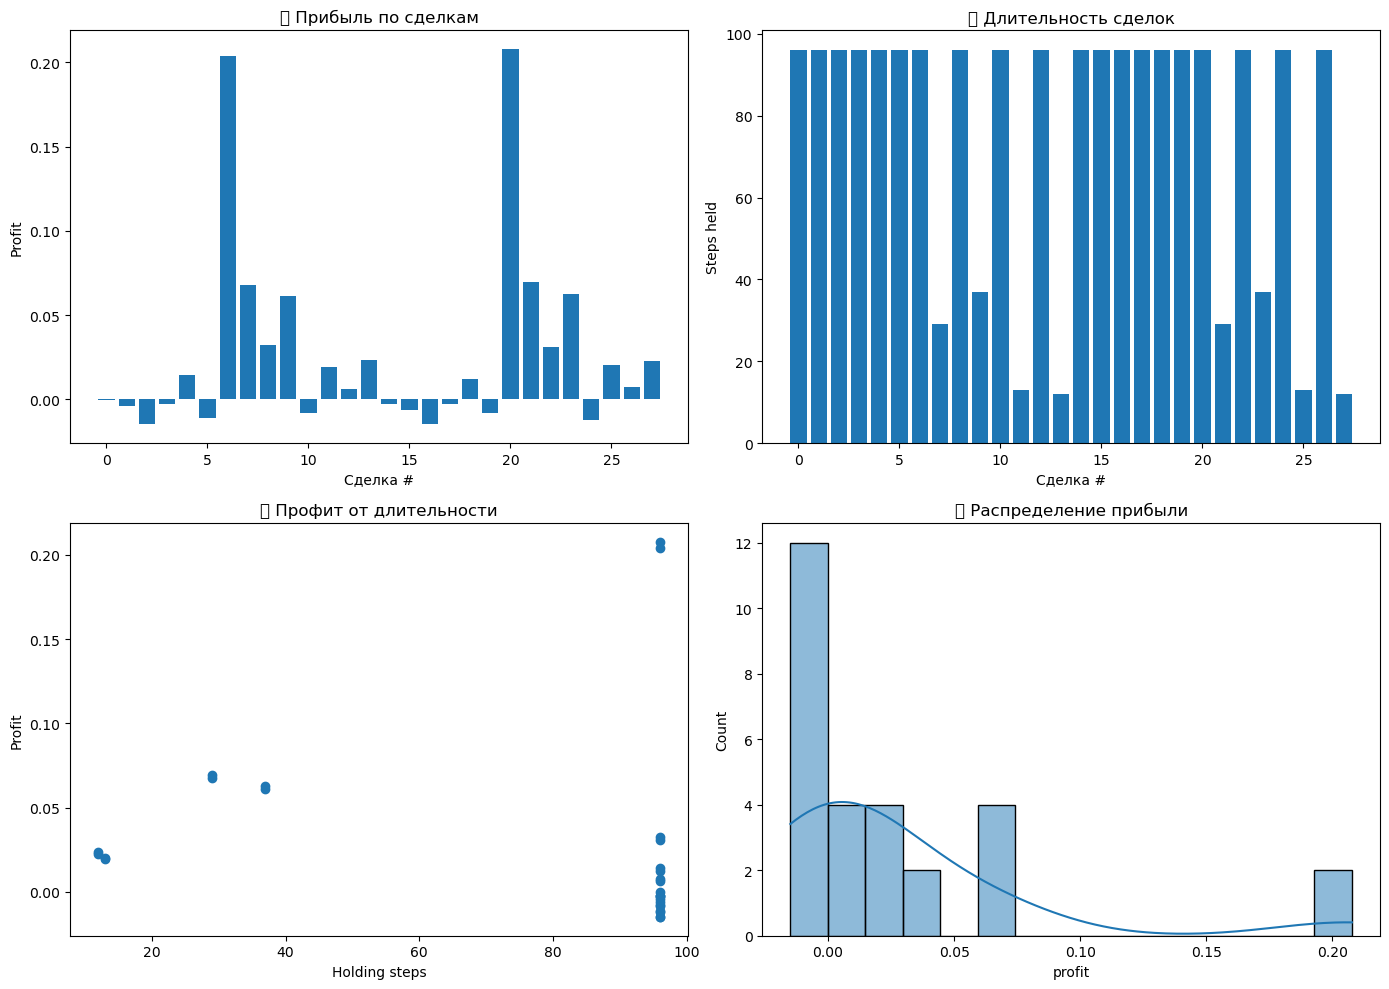

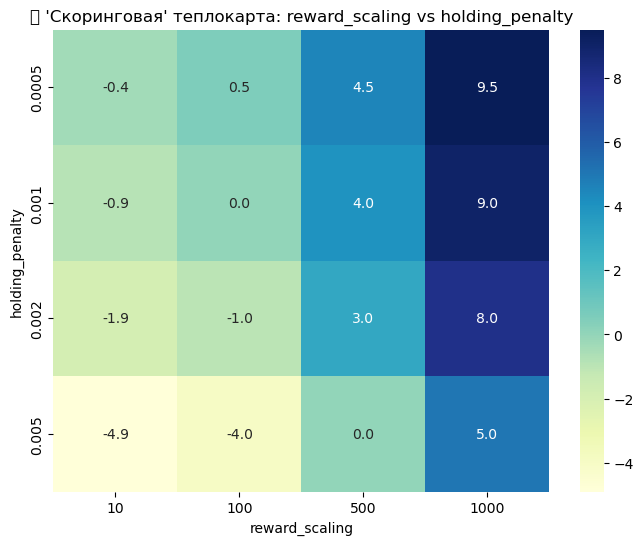

       entry_step  exit_step  profit  holding  entry_price  exit_price
count       28.00      28.00   28.00    28.00        28.00       28.00
mean     1,261.93   1,337.00    0.03    75.07     2,138.83    2,199.01
std        351.10     331.97    0.06    34.19       323.88      341.63
min        672.00     768.00   -0.01    12.00     1,815.90    1,811.94
25%        963.00   1,059.00   -0.00    37.00     1,837.85    1,835.09
50%      1,302.50   1,365.00    0.01    96.00     2,025.35    2,282.23
75%      1,552.00   1,648.00    0.03    96.00     2,516.32    2,546.72
max      1,787.00   1,799.00    0.21    96.00     2,551.95    2,612.32


In [25]:
test(vec_env_eth_da, dagger_model_eth, df_future, crypt="dagger_eth_2")

In [28]:
dagger_model_eth = PPOWithImitation.load(
        "ppo_dagger_final",
        env=vec_env_eth_da,
        custom_objects={"policy_class": TransformerPolicy}
    )

Создана (или уже существует) папка: dagger_eth_2_1
✅ dagger_eth_2_1 Total reward for episode: -5729.33
🔁 dagger_eth_2_1 Total trades executed: 28
📉 Max drawdown: 104.61
📈 Sharpe Ratio: -1.37
Логи эпизода сохранены в dagger_eth_2_1/episode_run_log.csv


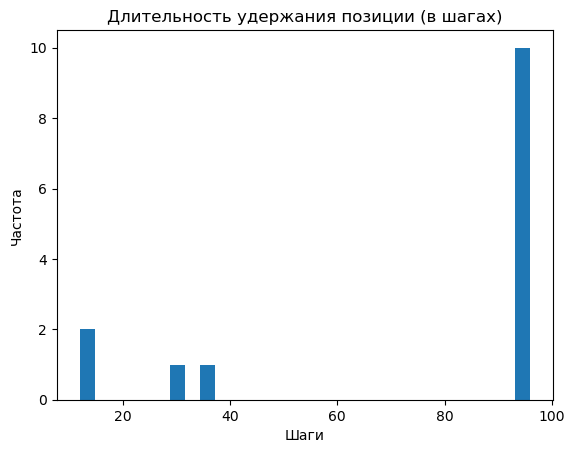

✅ Total reward: -5729.33
🔁 Total trades executed: 27
📉 Max drawdown: 104.61
📈 Sharpe Ratio: -1.37


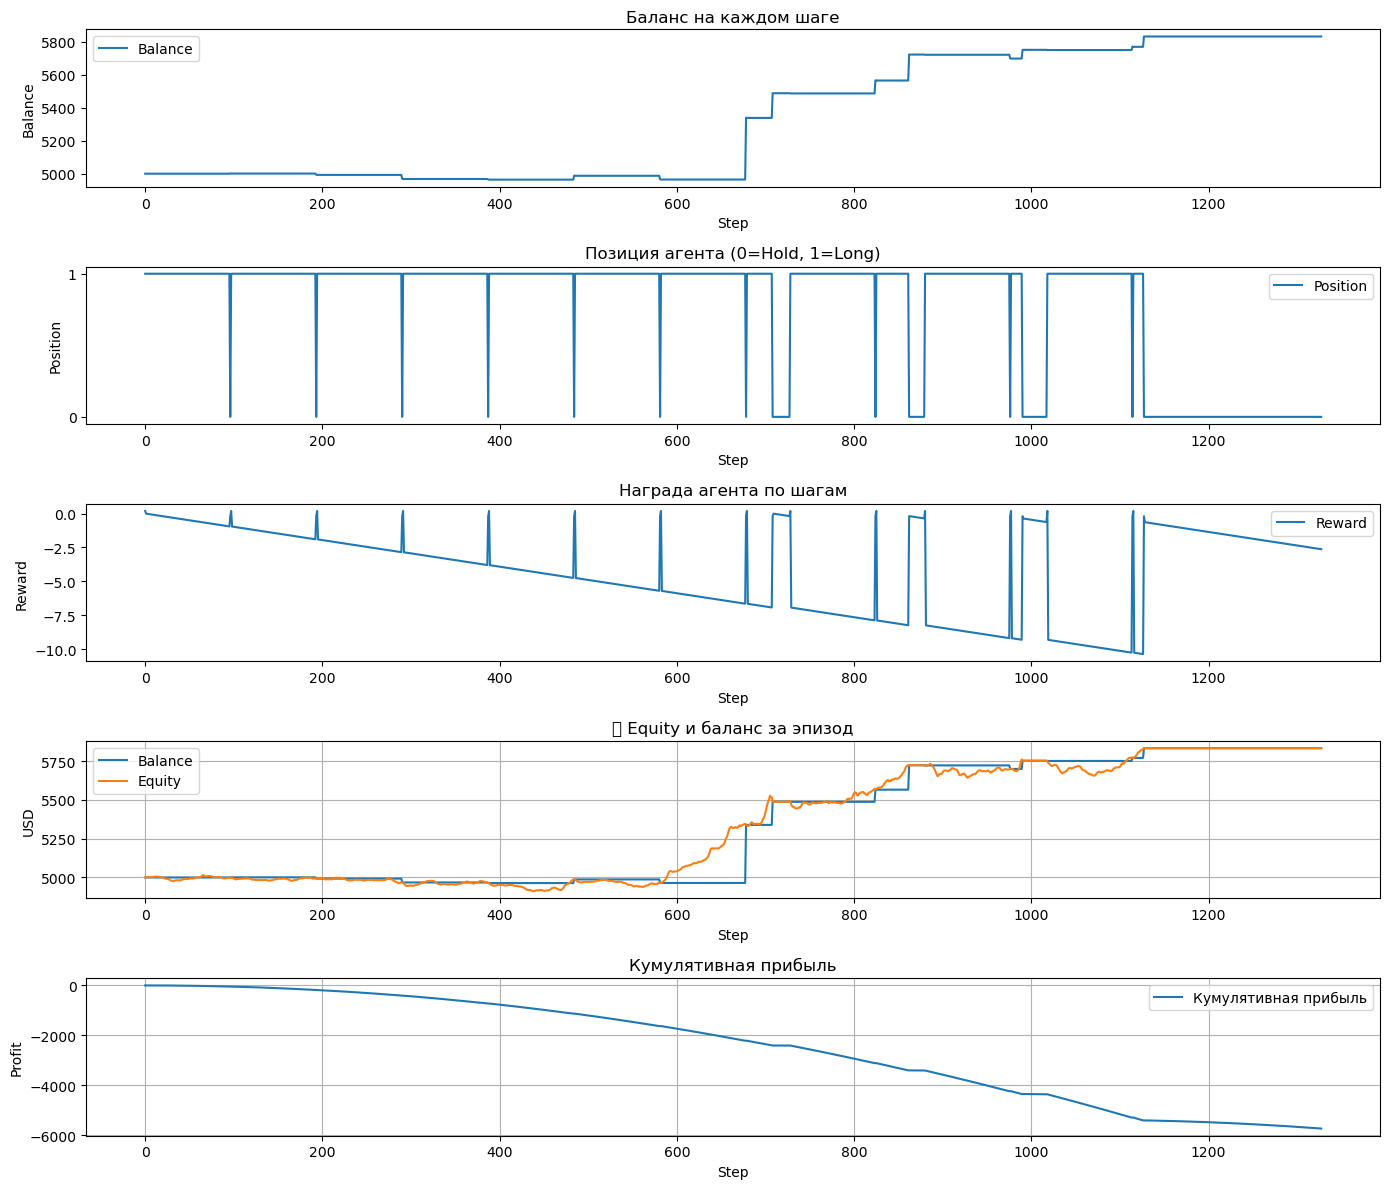

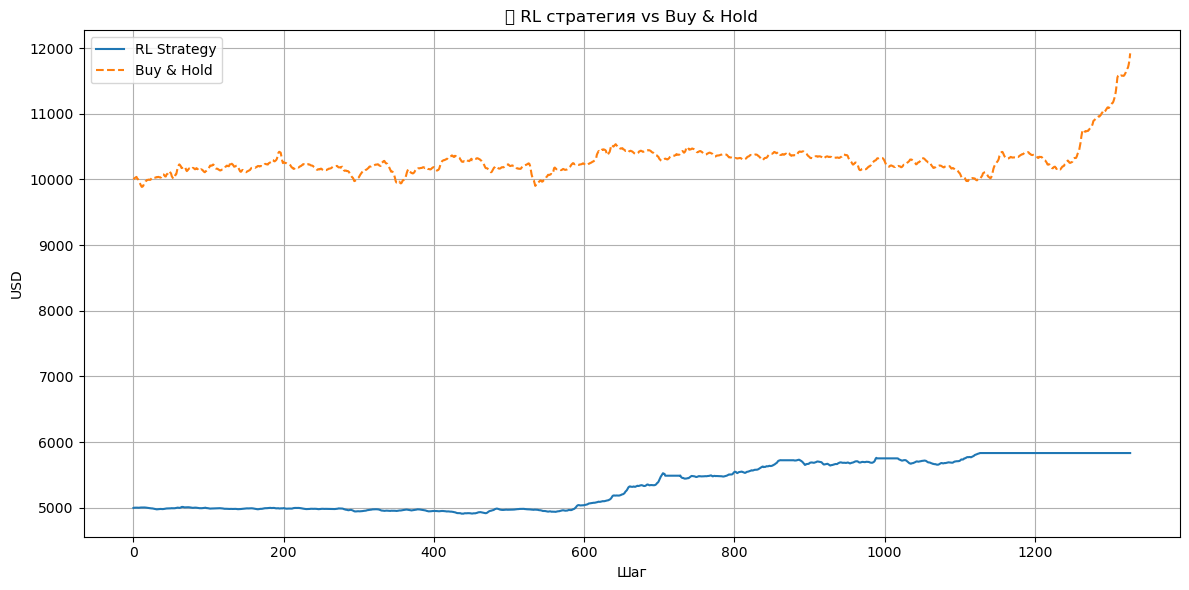


Общее число сделок: 18
Средняя длительность сделки (в шагах): 70.72
Средняя прибыль на сделку: 0.02
Суммарная прибыль: 0.32


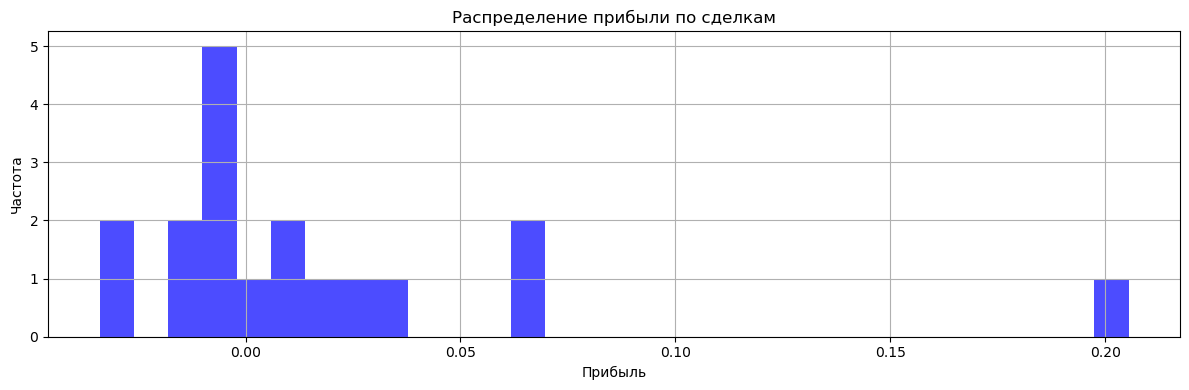

📊 Метрики по всем эпизодам:
▶ Средняя Total Reward: -5729.33
▶ Средний Sharpe Ratio: -1.37
▶ Средний Max Drawdown: 105.26
▶ Среднее число сделок: 32.00
▶ Средняя прибыль на сделку: 0.02
▶ Средняя длительность сделки: 72.62 шагов


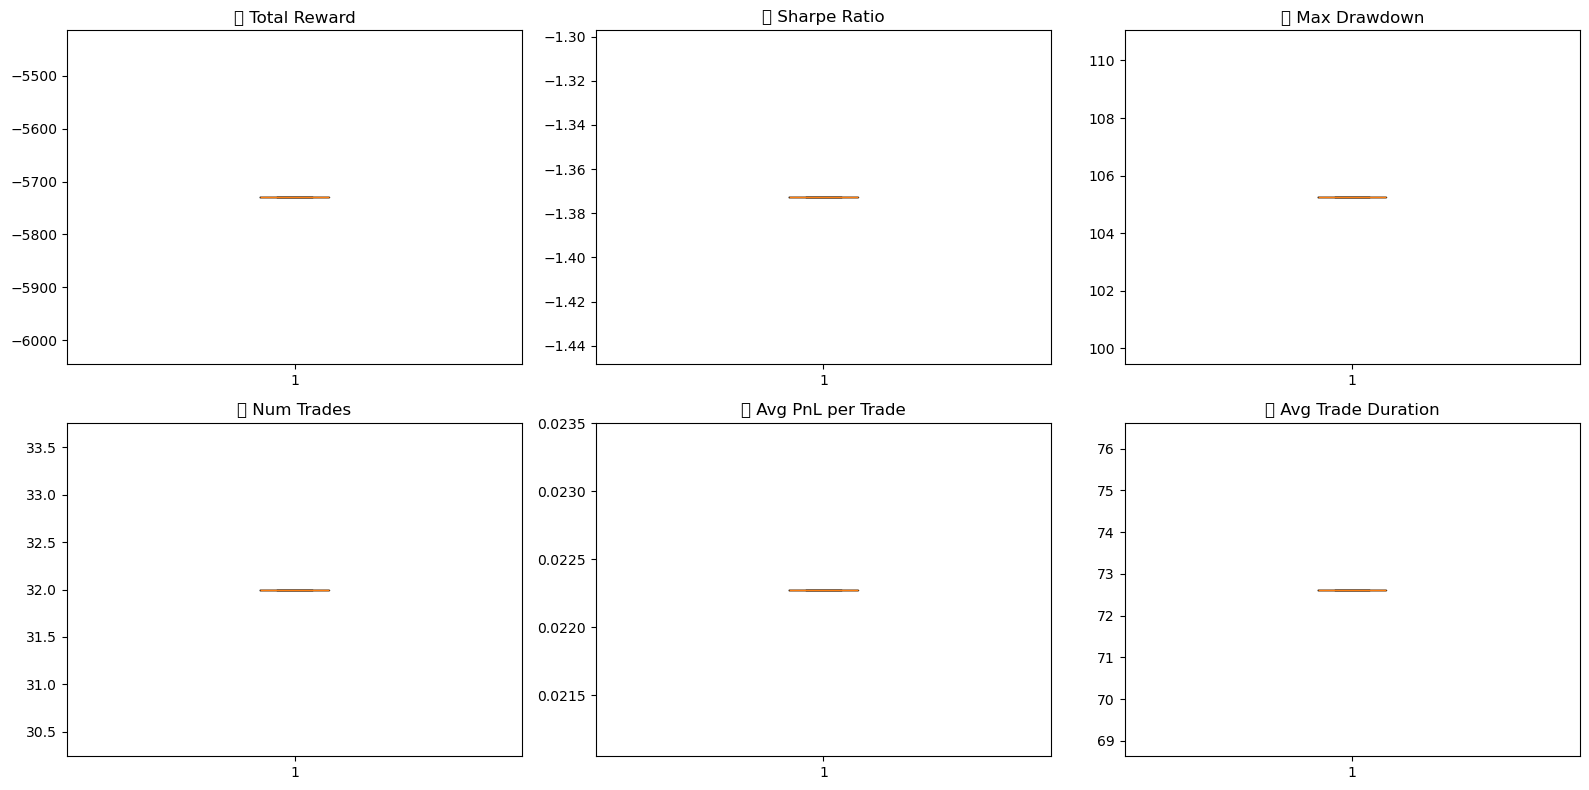

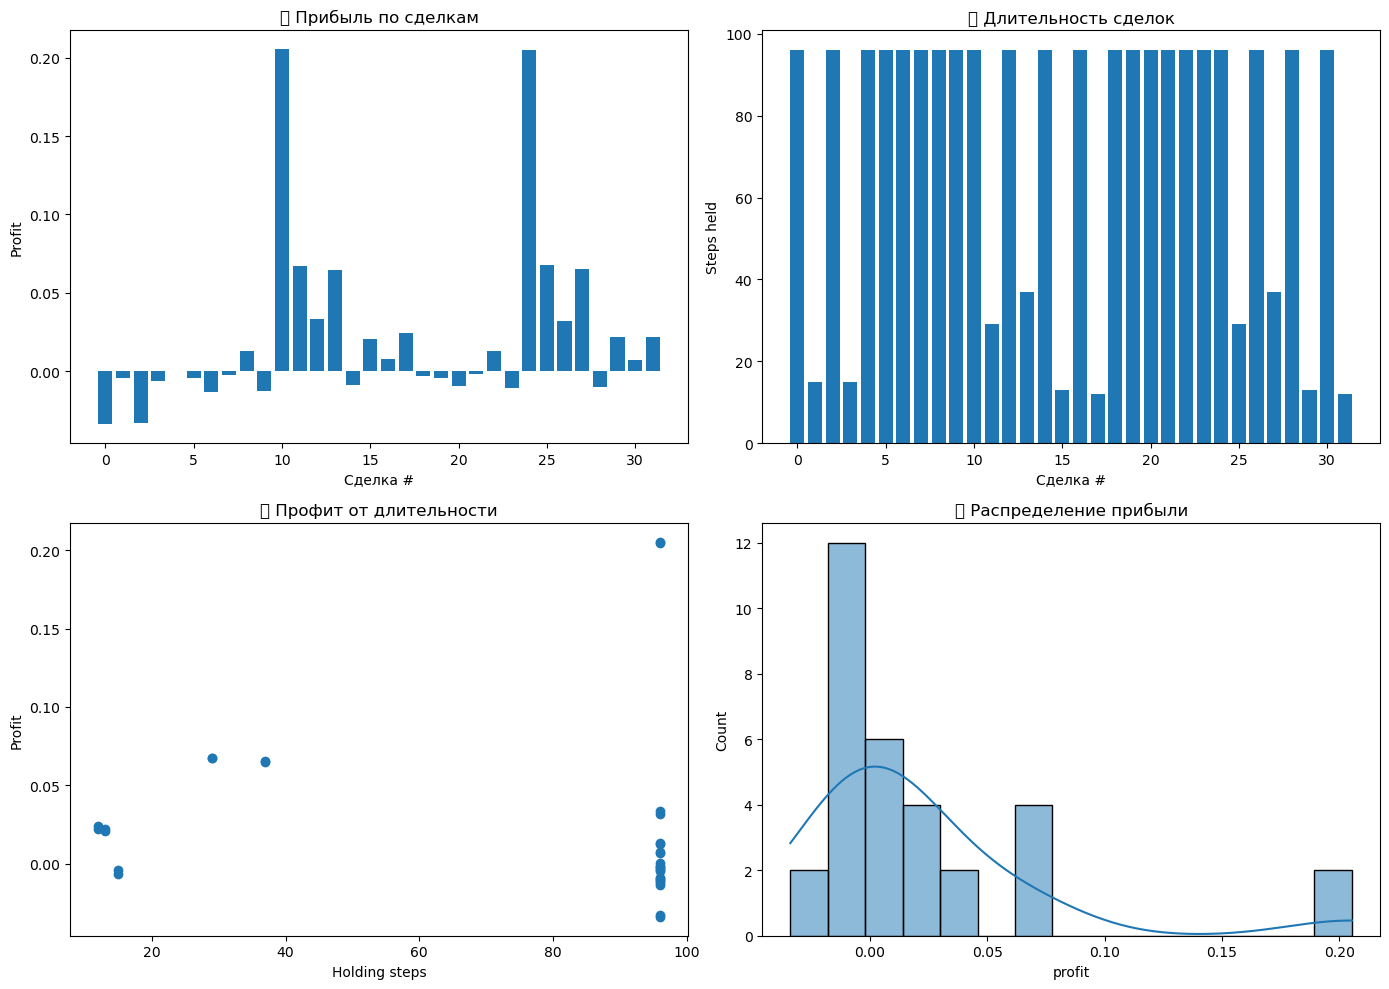

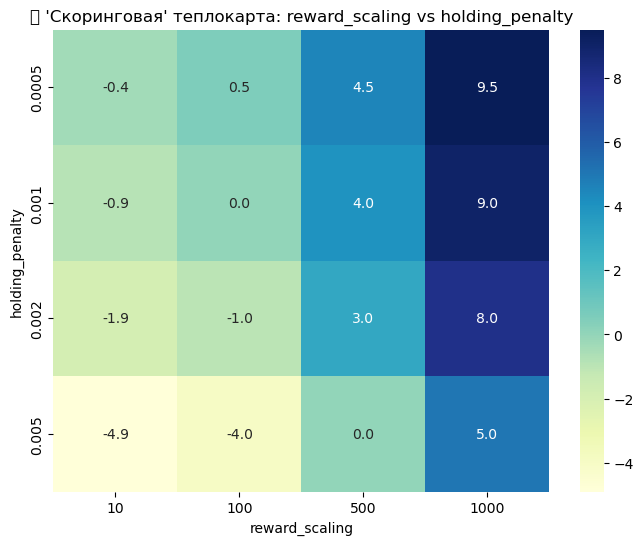

       entry_step  exit_step  profit  holding  entry_price  exit_price
count       32.00      32.00   32.00    32.00        32.00       32.00
mean     1,337.75   1,410.38    0.02    72.62     2,200.82    2,248.56
std        386.27     367.28    0.05    35.68       346.17      345.05
min        672.00     768.00   -0.03    12.00     1,815.28    1,814.19
25%      1,035.75   1,131.75   -0.01    35.00     1,840.96    1,839.00
50%      1,375.50   1,438.00    0.00    96.00     2,276.74    2,392.80
75%      1,659.25   1,693.00    0.03    96.00     2,529.24    2,571.80
max      1,917.00   1,932.00    0.21    96.00     2,688.02    2,614.45


In [29]:
test(vec_env_eth_da, dagger_model_eth, df_future, crypt="dagger_eth_2_1")

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(bc_accuracies, marker='o')
plt.title("BC Accuracy")
plt.xlabel("DAgger итерация")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.plot(ppo_rewards, marker='o', color='green')
plt.title("PPO Mean Reward")
plt.xlabel("DAgger итерация")
plt.ylabel("Mean Reward")

plt.subplot(1, 3, 3)
plt.plot(ppo_agreements, marker='o', color='purple')
plt.title("Agreement PPO vs Expert")
plt.xlabel("DAgger итерация")
plt.ylabel("Agreement Rate")

plt.tight_layout()
plt.show()

In [12]:
def make_env_eth_cnn():
    return ETHTradingEnv(
        df=eth_with_ta,
        state_columns=state_columns_eth,
        initial_balance=5000,
        trade_penalty=0.01,
        max_steps=2000,
        reward_scaling=100,
        window_size=672  # 7 дней по 15 минут
    )

vec_env_eth_cnn = DummyVecEnv([make_env_eth_cnn])

In [ ]:
def train_model(checkpoint_path=None, total_timesteps=300000, chunk_size=5000):
    # Создаем среду
    env = vec_env_eth_cnn  # или создаем заново

    if checkpoint_path and os.path.exists(checkpoint_path):
        model = PPO.load(checkpoint_path, env=env)
        print(f"Loaded model from {checkpoint_path}")
    else:
        model = PPO(
            policy=HybridTransformerPolicy,
            env=env,
            verbose=1,
            n_steps=1344,
            batch_size=128,
            gae_lambda=0.95,
            gamma=0.99,
            n_epochs=10,
            learning_rate=3e-4,
            clip_range=0.2,
            max_grad_norm=0.5,
            vf_coef=0.5,
            normalize_advantage=True,
            ent_coef=0.2,
            device='cuda'  # если доступен GPU
        )
        print("Created new model")

    
    current_step = 0
    step_file = "current_step.txt"
    if os.path.exists(step_file):
        with open(step_file, "r") as f:
            current_step = int(f.read())

    remaining_steps = total_timesteps - current_step
    print(f"Starting training from step {current_step}, remaining {remaining_steps} steps")

    while remaining_steps > 0:
        steps_to_train = min(chunk_size, remaining_steps)
        print(f"Training next {steps_to_train} steps...")
        model.learn(total_timesteps=steps_to_train, progress_bar=True)
        current_step += steps_to_train
        remaining_steps -= steps_to_train

        # Сохраняем модель и текущий шаг
        model.save(checkpoint_path)
        with open(step_file, "w") as f:
            f.write(str(current_step))

        print(f"Saved checkpoint at step {current_step}")

    print("Training completed")

In [ ]:
train_model(checkpoint_path="ppo_eth_checkpoint", total_timesteps=350_000, chunk_size=6600)

# Обучаем агента SOL

In [25]:
excluded = ['future_return', 'target']
state_columns_sol = [col for col in sol_with_ta.columns if col not in excluded]

In [26]:
def make_env_sol():
    return ETHTradingEnv(
        df=sol_with_ta,
        state_columns=state_columns_sol,
        initial_balance=5000,
        trade_penalty=0.01,
        max_steps=2000,
        reward_scaling=100,
        window_size=672  # 7 дней по 15 минут
    )

vec_env_sol = DummyVecEnv([make_env_sol])

In [27]:
# 3. Обучим агента
model_sol = PPO(
    policy=TransformerPolicy,
    env=vec_env_sol,
    verbose=1,
    n_steps=1344,
    batch_size=128,
    gae_lambda=0.95,
    gamma=0.99,
    n_epochs=10,
    learning_rate=3e-4,
    clip_range=0.2,           # 👈 обязательно
    max_grad_norm=0.5,        # 👈 ограничим градиенты
    vf_coef=0.5,
    normalize_advantage=True,
    ent_coef=0.2  # <-- Ключевой параметр для стимула к исследованию
)
model_sol.learn(total_timesteps=450_000, progress_bar=True)

Using cuda device


Output()

-----------------------------
| time/              |      |
|    fps             | 237  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 1344 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 2           |
|    time_elapsed         | 46          |
|    total_timesteps      | 2688        |
| train/                  |             |
|    approx_kl            | 0.008710956 |
|    clip_fraction        | 0.036       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.00246     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.962       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00541    |
|    value_loss           | 2.23        |
-----------------------------------------
----------------------------------

In [28]:
model_sol.save("ppo_sol_trading_v2")

In [ ]:
# model_sol = PPO.load("ppo_sol_trading_v1", env=vec_env_sol, custom_objects={"policy_class": TransformerPolicy})

✅ sol Total reward for episode: -5901.82
🔁 sol Total trades executed: 10
📉 Max drawdown: 2.15
📈 Sharpe Ratio: -1.34
Логи эпизода сохранены в sol/episode_run_log.csv


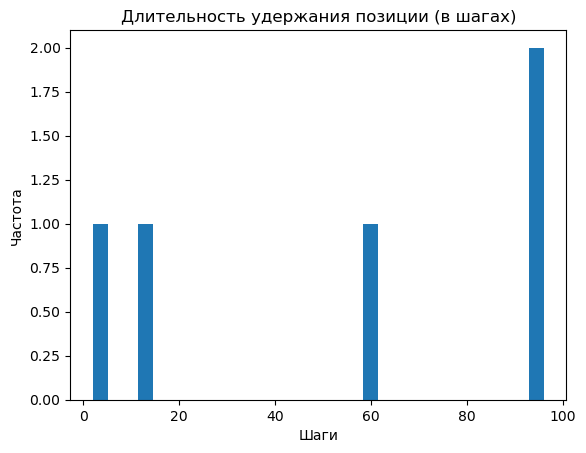

✅ Total reward: -5901.82
🔁 Total trades executed: 9
📉 Max drawdown: 2.15
📈 Sharpe Ratio: -1.34


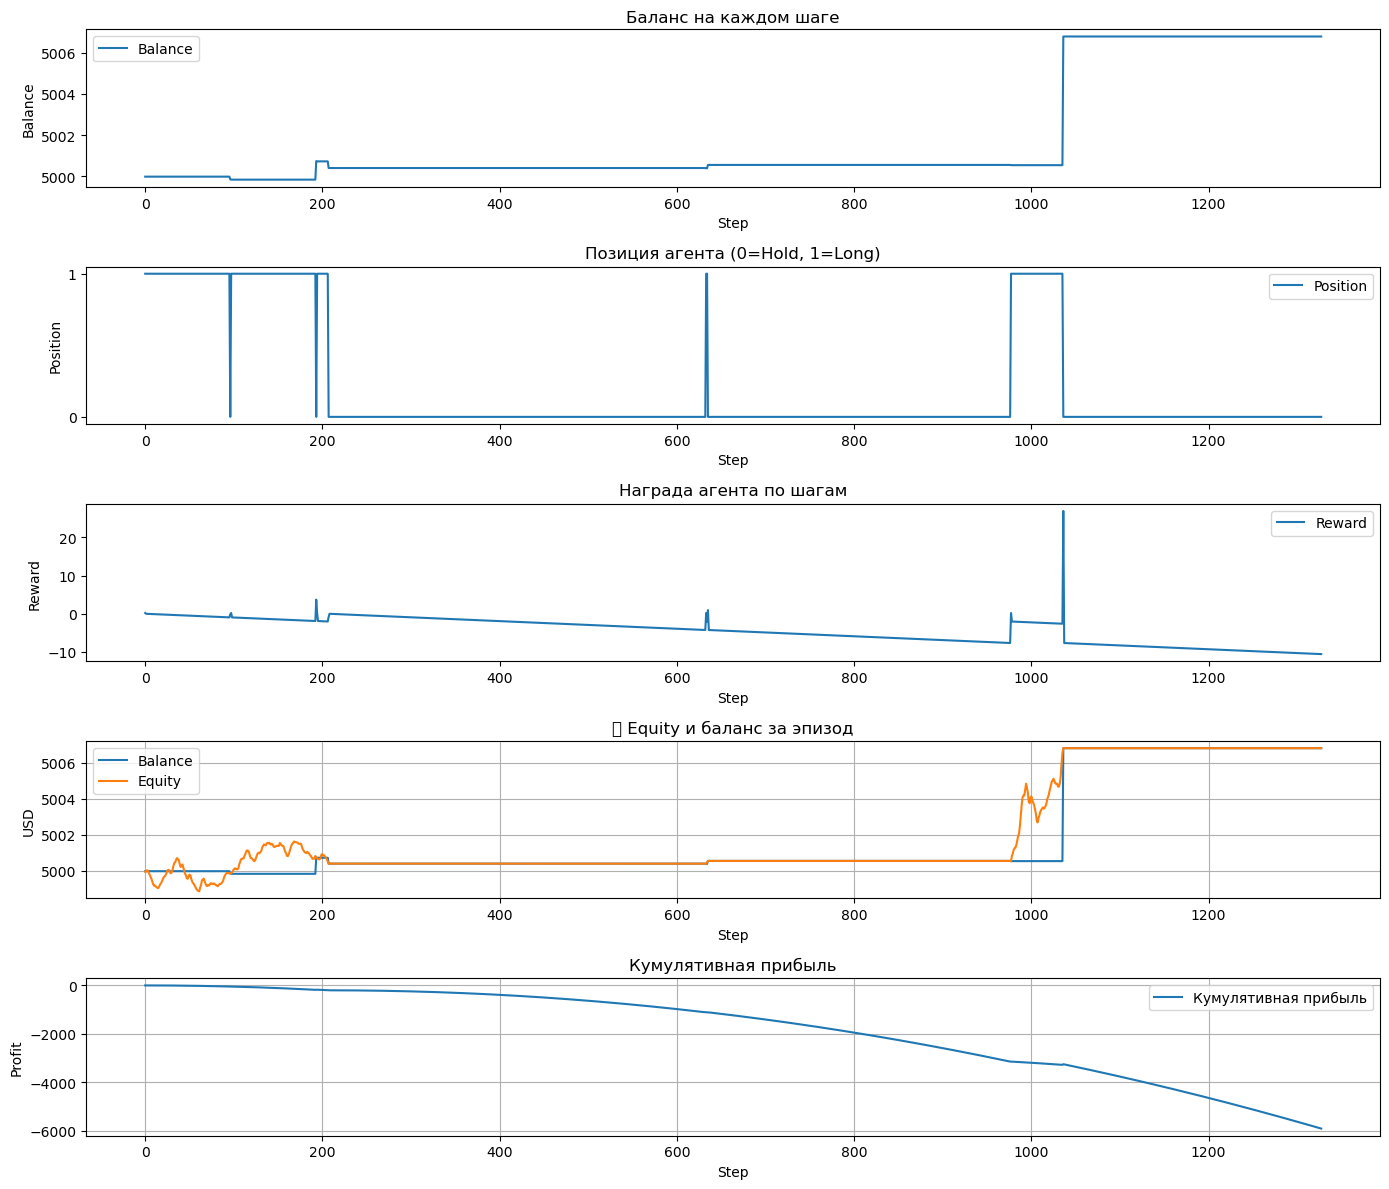

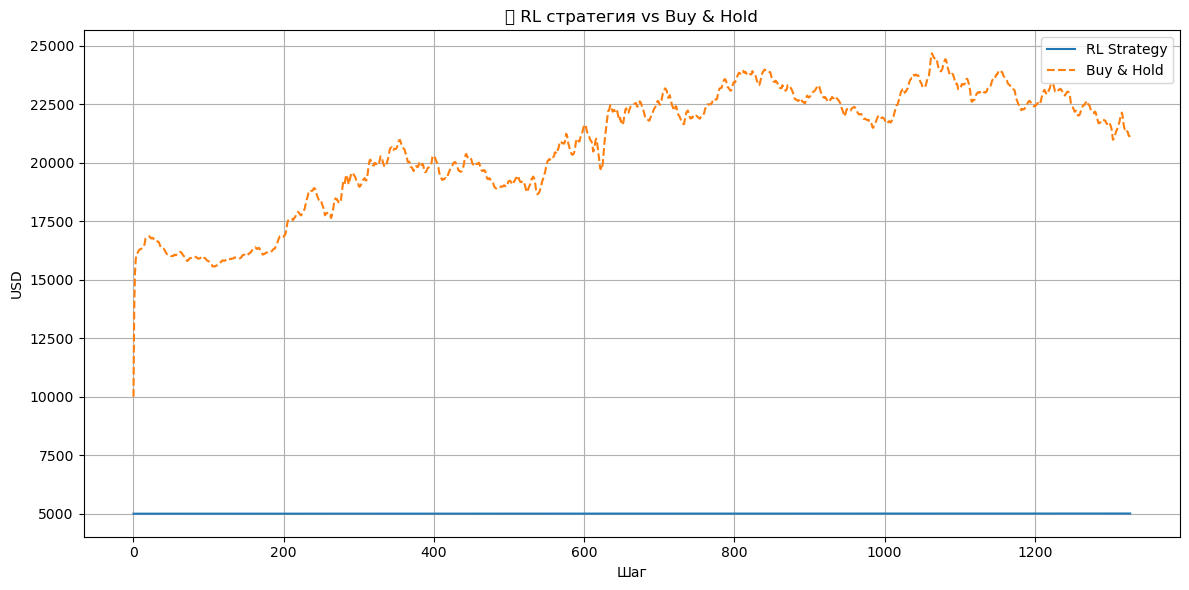


Общее число сделок: 79541
Средняя длительность сделки (в шагах): 2.81
Средняя прибыль на сделку: -0.00
Суммарная прибыль: -106.55


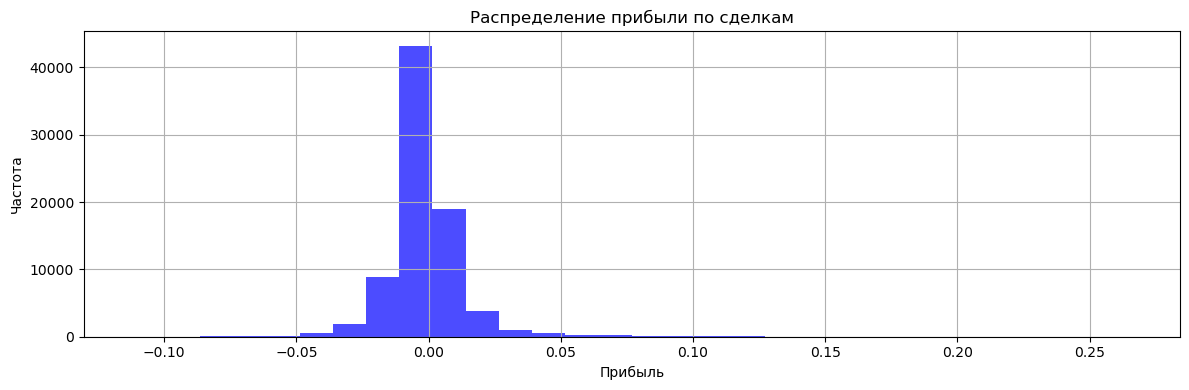

📊 Метрики по всем эпизодам:
▶ Средняя Total Reward: -5902.35
▶ Средний Sharpe Ratio: -1.34
▶ Средний Max Drawdown: 2.15
▶ Среднее число сделок: 79546.00
▶ Средняя прибыль на сделку: -0.00
▶ Средняя длительность сделки: 2.82 шагов


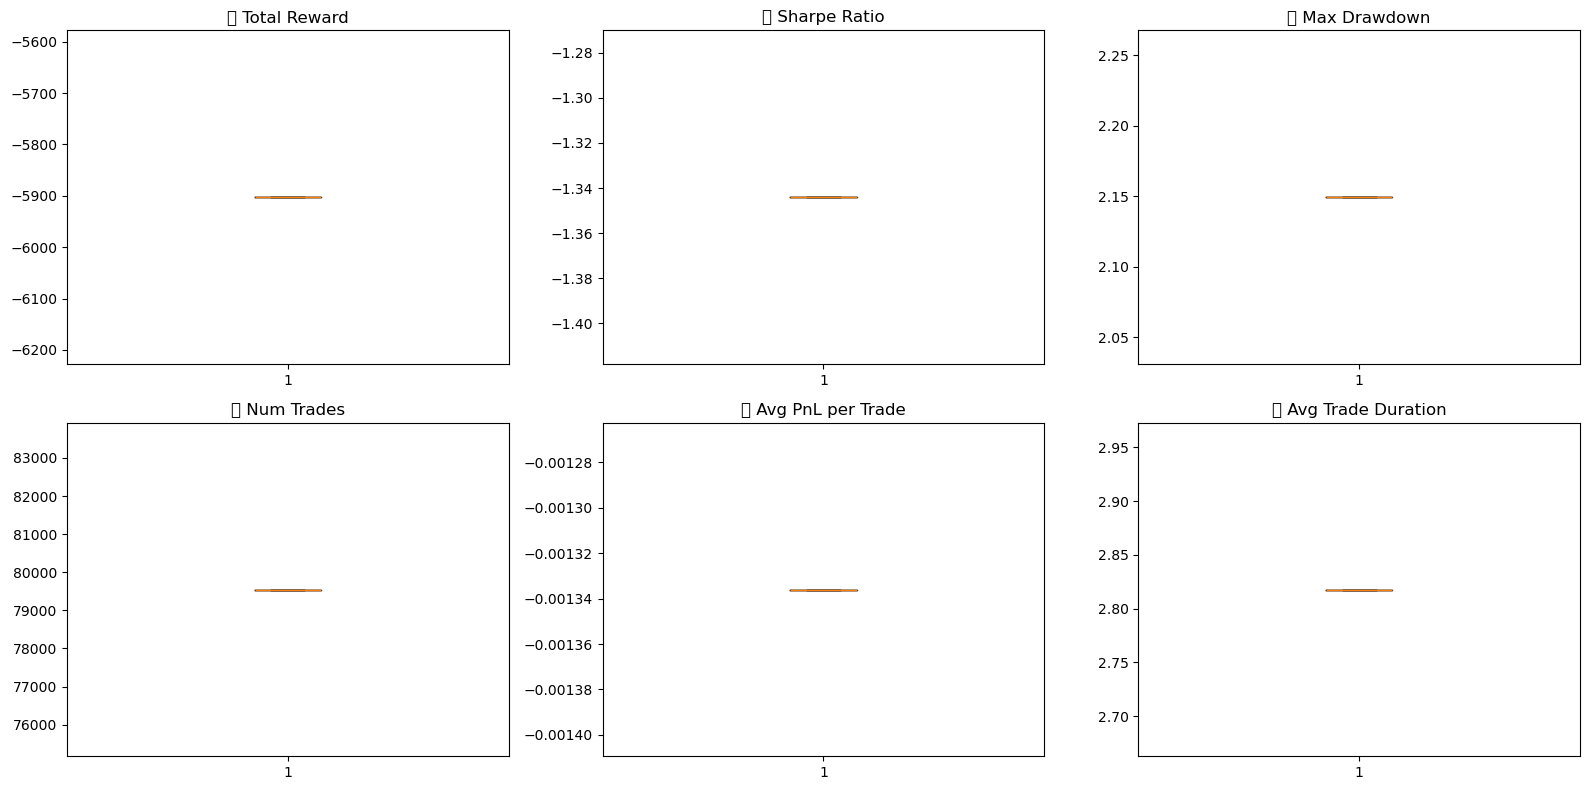

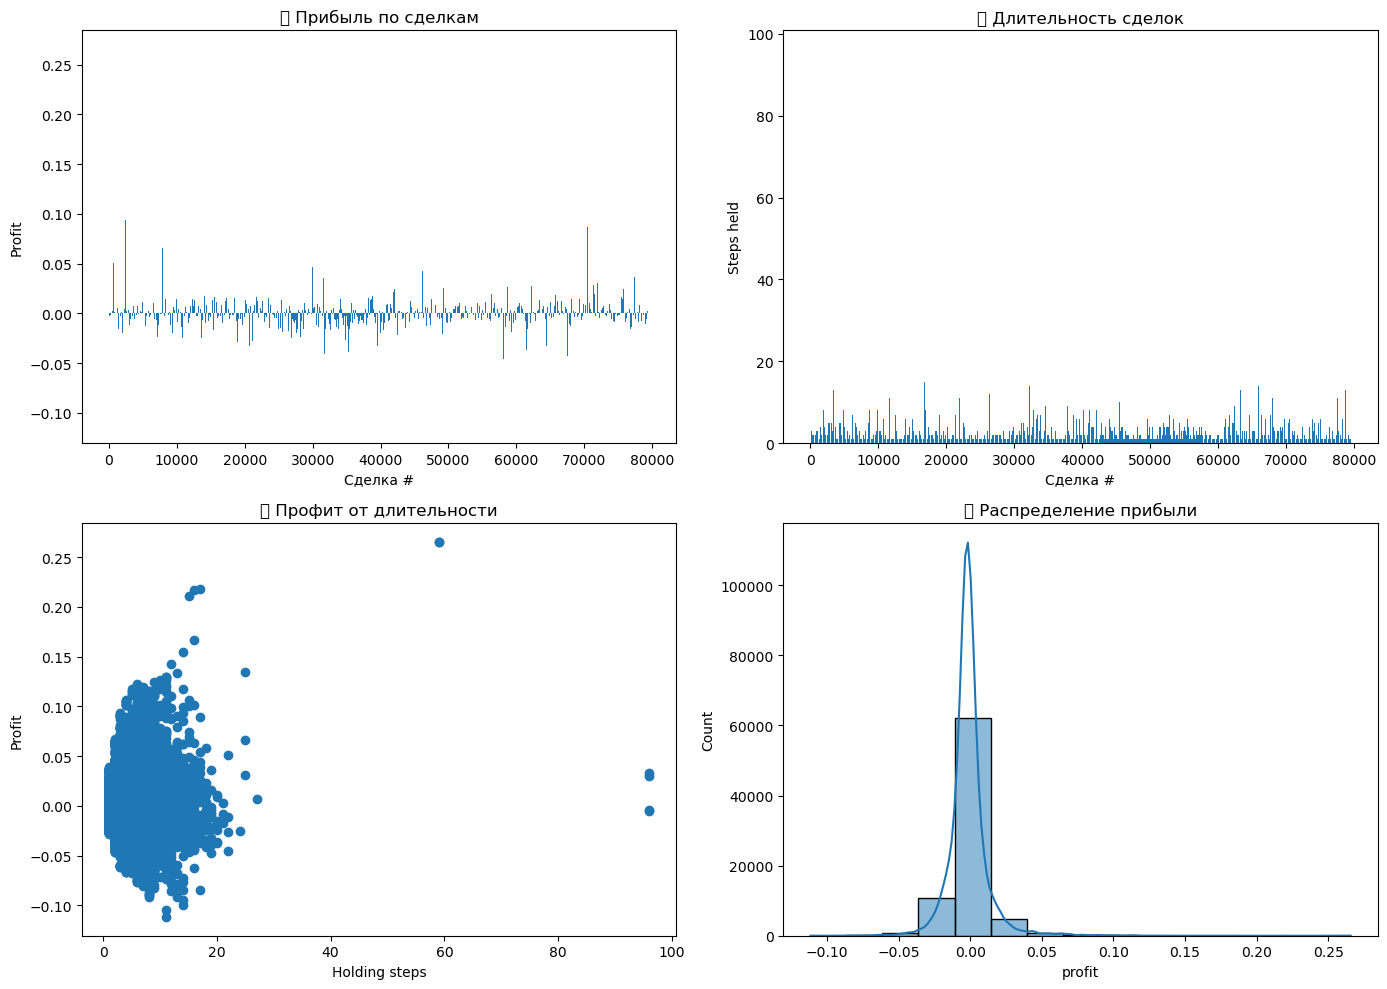

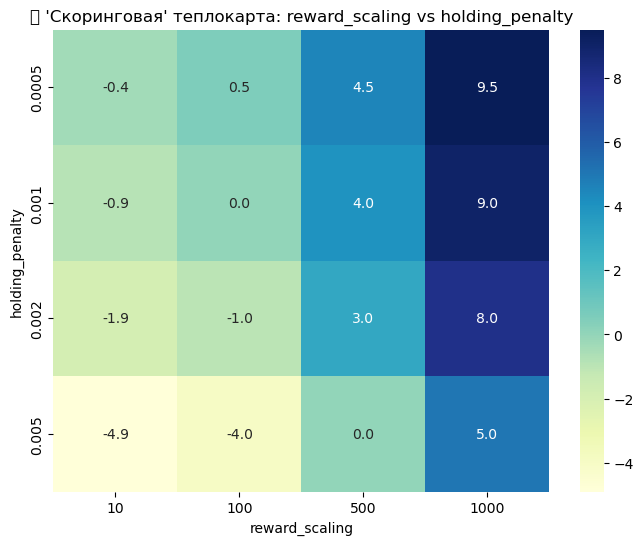

       entry_step  exit_step    profit   holding  entry_price  exit_price
count   79,546.00  79,546.00 79,546.00 79,546.00    79,546.00   79,546.00
mean     1,335.11   1,337.93     -0.00      2.82        28.01       28.00
std        383.57     383.56      0.01      2.40         2.34        2.35
min        672.00     673.00     -0.11      1.00        21.92       21.89
25%      1,003.00   1,006.00     -0.01      1.00        26.37       26.35
50%      1,335.00   1,337.00     -0.00      2.00        27.39       27.38
75%      1,667.00   1,670.00      0.00      4.00        28.65       28.64
max      1,999.00   2,000.00      0.27     96.00        35.43       35.38


In [29]:
test(vec_env_sol, model_sol, sol_with_ta, crypt="sol")

# Дообучение RL агента (пока общий код для обоих агентов)

In [ ]:
df_logs = pd.read_csv('df_logs.csv',  index_col='timestamp')

Ежемесячный цикл:
- Инференс → сбор новых данных → дообучение BC через DAgger с использованием эксперта (XGBoost).

Квартальный цикл:
- Инференс → сбор новых данных →  и обновление более мощного эксперта — трансформера, или ансамбля (трансформер + XGBoost).
- Использование этого эксперта для дообучения агента через DAgger.

In [ ]:
df_matched = df[df.index.isin(df_logs.index)]    # df датафрейм с криптой за переод инференса  df_logs - лоиг инференса
df_logs_matched = df_logs[df_logs.index.isin(df_matched.index)]

# Убедимся, что индексы совпадают
assert all(df_matched.index == df_logs_matched.index)

In [ ]:
X_behavioral = df_matched.drop(columns=["target", "future_return"], errors="ignore")
y_behavioral = df_logs_matched["real_class"]  # или "real_class", если хочешь обучать на классе

print("Размер обучающего набора:", X_behavioral.shape)
print("Распределение действий:")
print(y_behavioral.value_counts())

In [ ]:
valid_idx = y_behavioral.notna()
X_behavioral_clean = X_behavioral[valid_idx]
y_behavioral_clean = y_behavioral[valid_idx]

## Подготовка месясчного эксперта

In [ ]:
def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "use_label_encoder": False,
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.5, 5.0),
        "random_state": 42,
    }

    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return f1_score(y_test, preds, average="macro")

In [ ]:
# Запуск Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=300)

print("Лучшие параметры:", study.best_params)

In [ ]:
best_params = {
    'max_depth': 5, 'learning_rate': 0.2824695721669672, 'n_estimators': 274, 'subsample': 0.9133653278592547, 'colsample_bytree': 0.6604227108196316, 'scale_pos_weight': 1.770183655695376,
    'random_state': 42,
    'use_label_encoder': False,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
final_model.save_model('xgb_model.json')

In [ ]:
final_model = XGBClassifier()
final_model.load_model('xgb_model.json')

In [ ]:
# --- BC сеть ---
class BCNet(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, n_actions=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, n_actions)
        )
    def forward(self, x):
        return self.net(x)

def train_bc(states, expert_actions, epochs=10, batch_size=64, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = states.shape[1]
    model = BCNet(input_dim).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    dataset = TensorDataset(torch.tensor(states, dtype=torch.float32), torch.tensor(expert_actions, dtype=torch.long))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * xb.size(0)
        print(f"BC Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(loader.dataset):.4f}")

    return model

def save_bc_model(model, path="bc_model.pth"):
    torch.save(model.state_dict(), path)
    print(f"[✓] BC модель сохранена в {path}")

def load_bc_model(input_dim, path="bc_model.pth"):
    model = BCNet(input_dim)
    model.load_state_dict(torch.load(path))
    model.eval()
    print(f"[✓] BC модель загружена из {path}")
    return model

# --- BC политика-обёртка ---
class BCPolicyWrapper:
    def __init__(self, bc_model):
        self.bc_model = bc_model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.bc_model.to(self.device)
        self.bc_model.eval()

    def predict(self, obs, deterministic=True):
        # Превращаем obs в плоский тензор
        x = obs.flatten()
        x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(0).to(self.device)
        with torch.no_grad():
            logits = self.bc_model(x_tensor)
            probs = torch.softmax(logits, dim=1)
            if deterministic:
                action = torch.argmax(probs, dim=1).item()
            else:
                dist = torch.distributions.Categorical(probs)
                action = dist.sample().item()
        return action, None

def bc_predict(model, X):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    with torch.no_grad():
        logits = model(X_tensor)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return preds

In [ ]:
# --- Создаем среду ---
def make_env():
    return BTCTradingEnv(
        df=df_matched,
        state_columns=state_columns,
        initial_balance=5000,
        trade_penalty=0.01,
        max_steps=2000,
        reward_scaling=100,
        window_size=672
    )
vec_env = DummyVecEnv([make_env])

In [ ]:
ppo_path = "ppo_btc_trading_v18.zip"
if os.path.exists(ppo_path):
    model = PPO.load(ppo_path, env=vec_env, custom_objects={"policy_class": TransformerPolicy})
    print("[✓] Загрузили PPO модель")
else:
    model = PPO(
        policy=TransformerPolicy,
        env=vec_env,
        verbose=1,
        n_steps=4096,
        batch_size=64,
        gae_lambda=0.95,
        gamma=0.99,
        n_epochs=10,
        learning_rate=3e-4,
        clip_range=0.2,
        max_grad_norm=0.5,
        vf_coef=0.5,
        normalize_advantage=True,
        ent_coef=0.2
    )
    print("[i] Создали новую PPO модель")


In [ ]:
# --- DAgger цикл ---
all_states = []
all_expert_actions = []

bc_accuracies = []
ppo_rewards = []
ppo_agreements = []

n_dagger_iters = 3
bc_model = None

for i in range(n_dagger_iters):
    print(f"\n=== DAgger Iteration {i+1} ===")

    # Выбор политики
    if i == 0 or bc_model is None:
        policy_for_data = model
    else:
        policy_for_data = BCPolicyWrapper(bc_model)

    # Сбор данных
    states, expert_actions = collect_dagger_data(vec_env, policy_for_data, final_model, n_steps=2000)
    all_states.append(states)
    all_expert_actions.append(expert_actions)

    X = np.vstack(all_states)
    y = np.hstack(all_expert_actions)

    # Train/val split
    split = int(0.9 * len(X))
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    # Обучение BC
    bc_model = train_bc(X_train, y_train, epochs=40)
    save_bc_model(bc_model, path=f"bc_model_iter{i+1}.pth")

    # Оценка BC
    y_pred = bc_predict(bc_model, X_val)
    acc = accuracy_score(y_val, y_pred)
    bc_accuracies.append(acc)
    print(f"[BC] Accuracy: {acc:.4f}")

    # Дообучение PPO
    print("[i] Дообучение PPO...")
    model.learn(total_timesteps=100_000, progress_bar=True)
    model.save(f"ppo_finetuned_dagger_iter{i+1}.zip")

    # Оценка PPO
    mean_reward = evaluate_policy(model, vec_env, n_eval_episodes=5)
    ppo_rewards.append(mean_reward)
    print(f"[PPO] Avg reward: {mean_reward:.2f}")

    # Agreement PPO vs эксперт
    expert_preds = final_model.predict(X_val)
    ppo_preds, _ = model.predict(X_val, deterministic=True)
    if isinstance(ppo_preds, np.ndarray) and ppo_preds.ndim > 1:
        ppo_preds = ppo_preds.squeeze()
    agreement = np.mean(ppo_preds == expert_preds)
    ppo_agreements.append(agreement)
    print(f"[PPO] Agreement with expert: {agreement:.4f}")

    cm = confusion_matrix(expert_preds, ppo_preds, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sell", "Hold", "Buy"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix PPO vs Expert (Iter {i+1})")
    plt.show()

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(bc_accuracies, marker='o')
plt.title("BC Accuracy")
plt.xlabel("DAgger итерация")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.plot(ppo_rewards, marker='o', color='green')
plt.title("PPO Mean Reward")
plt.xlabel("DAgger итерация")
plt.ylabel("Mean Reward")

plt.subplot(1, 3, 3)
plt.plot(ppo_agreements, marker='o', color='purple')
plt.title("Agreement PPO vs Expert")
plt.xlabel("DAgger итерация")
plt.ylabel("Agreement Rate")

plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame({
    'dagger_iter': list(range(1, n_dagger_iters + 1)),
    'bc_accuracy': bc_accuracies,
    'ppo_reward': ppo_rewards,
    'ppo_expert_agreement': ppo_agreements
})
df.to_csv("dagger_metrics.csv", index=False)
print("[✓] Метрики сохранены в dagger_metrics.csv")
